In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Lars, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import random
import missingno as msno
import math
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Data Preprocessing

In [2]:
# Read training data
data = pd.read_csv('case1Data.csv', na_values="NaN")

# Separate target variable y and features X
y = data['y']
X = data.drop(columns=['y'])

print(f"X: {X.shape}")
print(f"y: {len(y)}")

X: (100, 100)
y: 100


In [3]:
X.head()

,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,6.359019,-13.367120,-2.483750,-6.641891,11.733539,NaN,-17.085361,22.194764,16.827888,-10.367142,...,-10.200888,3.980048,-4.433274,-1.473723,NaN,74.0,72.0,72.0,73.0,73.0
1,3.873664,-8.470389,-3.055012,NaN,11.420983,1.822330,-13.694100,22.738654,20.307503,-2.859097,...,-9.740207,NaN,-2.629314,4.816987,-12.240248,74.0,72.0,72.0,73.0,73.0
2,5.275824,-12.070531,-1.366168,-4.819100,10.721527,-5.125992,-17.476865,NaN,15.963889,-3.257940,...,-14.501970,10.054005,NaN,NaN,-11.107921,73.0,72.0,75.0,74.0,74.0
3,4.430110,-4.467975,-0.730736,-10.047104,11.498539,-2.870260,-14.033012,18.225190,10.409488,-5.616061,...,-11.086963,2.019726,-8.531959,3.520833,NaN,71.0,72.0,73.0,71.0,72.0
4,3.116458,-8.518713,-6.796050,NaN,7.646285,-3.118309,-13.102567,22.801217,16.680208,-3.357765,...,-9.117422,6.627601,-2.805531,5.914351,-11.240573,72.0,72.0,72.0,74.0,75.0


In [4]:
X.info() # Detailed information on features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_01    87 non-null     float64
 1   x_02    79 non-null     float64
 2   x_03    85 non-null     float64
 3   x_04    86 non-null     float64
 4   x_05    88 non-null     float64
 5   x_06    88 non-null     float64
 6   x_07    84 non-null     float64
 7   x_08    80 non-null     float64
 8   x_09    87 non-null     float64
 9   x_10    87 non-null     float64
 10  x_11    88 non-null     float64
 11  x_12    76 non-null     float64
 12  x_13    81 non-null     float64
 13  x_14    88 non-null     float64
 14  x_15    87 non-null     float64
 15  x_16    87 non-null     float64
 16  x_17    86 non-null     float64
 17  x_18    90 non-null     float64
 18  x_19    88 non-null     float64
 19  x_20    79 non-null     float64
 20  x_21    82 non-null     float64
 21  x_22    88 non-null     float64
 22  x_

All the variables in X have missing values, but no observation is missing a y value

In [5]:
# Check for missing values
print("Nissing values in X:\n", X.isnull().sum())
print("Number of variables with missing values:", X.isnull().any().sum())
print("Nissing values in y:", y.isnull().sum())

Nissing values in X:
 x_01    13
x_02    21
x_03    15
x_04    14
x_05    12
        ..
C_01    22
C_02    22
C_03    22
C_04    22
C_05    22
Length: 100, dtype: int64
Number of variables with missing values: 100
Nissing values in y: 0


In [6]:
X.describe() # Summary statistics for features 

,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
count,87.000000,79.000000,85.000000,86.000000,88.000000,88.000000,84.000000,80.000000,87.000000,87.000000,...,90.000000,81.000000,87.000000,90.000000,86.000000,78.000000,78.0,78.000000,78.000000,78.000000
mean,2.794472,-10.428729,-4.056112,-6.029949,9.815258,-4.057966,-13.534972,22.439790,14.002414,-4.879578,...,-12.617194,5.967559,-4.363874,3.350329,-10.545234,73.000000,72.0,72.794872,73.333333,72.846154
std,2.902720,2.553962,2.904539,3.132403,2.610209,3.295600,2.817909,2.797903,3.190918,2.948038,...,2.669706,2.686854,2.775601,2.927385,2.850058,1.376991,0.0,1.361426,1.401916,1.358732
min,-4.074607,-15.316637,-10.840247,-13.320232,2.099694,-10.965169,-19.564483,14.281130,5.574270,-11.858662,...,-19.259988,-1.428501,-12.460672,-2.406875,-16.268568,71.000000,72.0,71.000000,71.000000,71.000000
25%,0.508729,-12.469860,-5.994591,-8.586691,8.170811,-6.215558,-15.442493,20.467655,12.132821,-7.128910,...,-14.560693,4.192116,-6.257376,1.631049,-12.716112,72.000000,72.0,72.000000,72.000000,72.000000
50%,2.654725,-10.488042,-3.631874,-5.793856,9.984196,-3.771067,-13.568780,22.435510,13.670553,-4.798655,...,-12.453503,5.779682,-4.097142,3.183367,-10.462356,73.000000,72.0,73.000000,74.000000,73.000000
75%,4.911518,-8.496459,-2.121282,-3.870936,11.410208,-1.972570,-11.639240,24.276527,15.980201,-2.861620,...,-10.727816,7.501444,-2.792433,4.863970,-8.431565,74.000000,72.0,74.000000,74.000000,74.000000
max,8.737899,-4.419087,1.840223,0.839114,18.339822,4.062024,-5.976463,28.777232,21.531983,1.066570,...,-6.804967,12.575124,1.853439,9.991009,-4.520711,75.000000,72.0,75.000000,75.000000,75.000000


In [7]:
y.describe() # Summary statistics for target

count    100.000000
mean     211.521238
std       72.476499
min       39.702218
25%      163.757582
50%      215.257947
75%      260.907758
max      375.823073
Name: y, dtype: float64

y's distribution is slightly left-skewed 

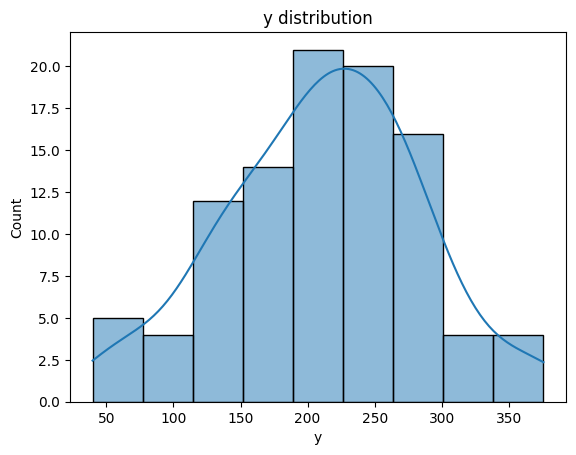

In [8]:
# Plot distribution of target variable y
sns.histplot(y, kde=True)
plt.title('y distribution')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

All categorical vaiables (the ones that start with C) have missing values. However, C_02 has only one unique value besides the NaN,   not providing any information, so it was removed.

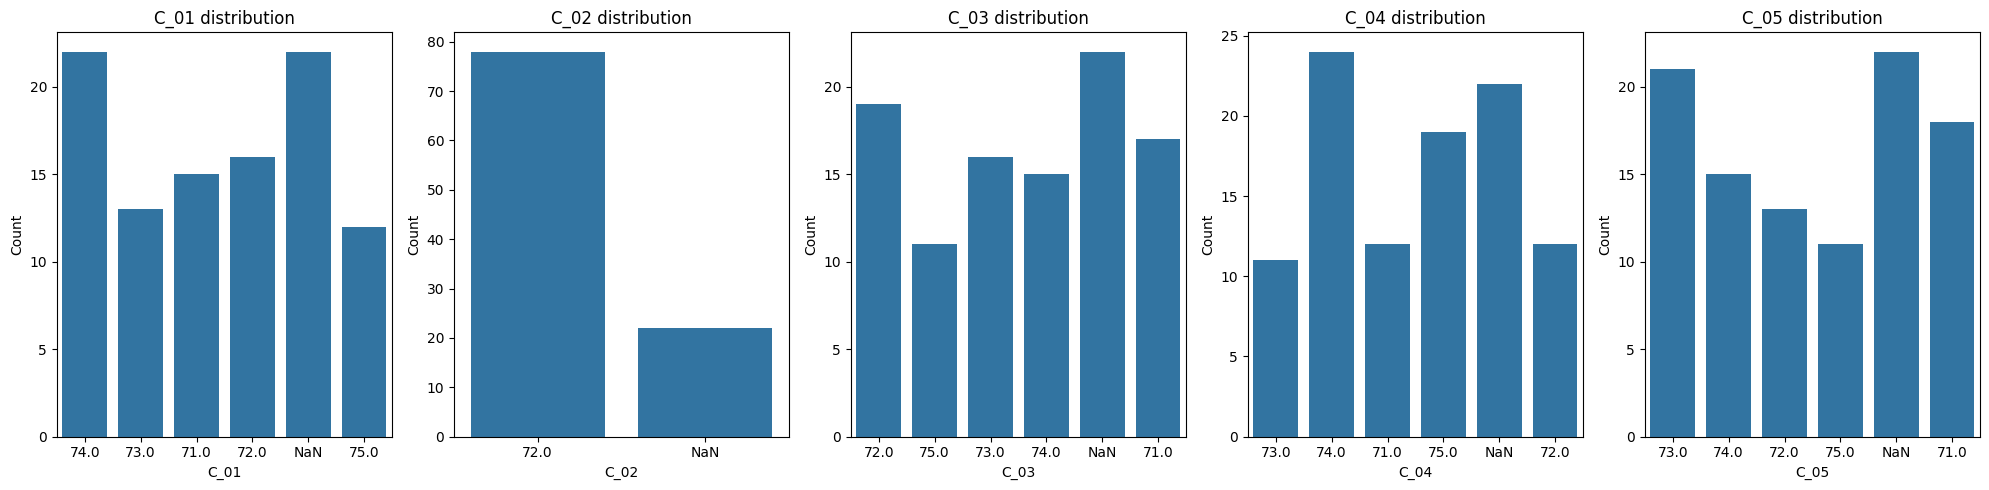

In [9]:
# Identify categorical features and convert them to object type
categorical_vars = ['C_01', 'C_02', 'C_03', 'C_04', 'C_05']
X.loc[:, categorical_vars] = X.loc[:,categorical_vars].astype('object')

# Visualize distribution of categorical variables
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, col in enumerate(categorical_vars):
    sns.countplot(x=col, data=X.fillna('NaN'), ax=ax[i])
    ax[i].set_title(f'{col} distribution')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [10]:
# remove variable C_02 as it has only one unique value so it does not provide any additional information
X.drop(columns=['C_02'], inplace=True)
categorical_vars.remove('C_02')

From the plots from the Missingno library, there does not seem to exist any pattern in the missing information, except for the categorical variables - if one is missing all are for a certain observation.

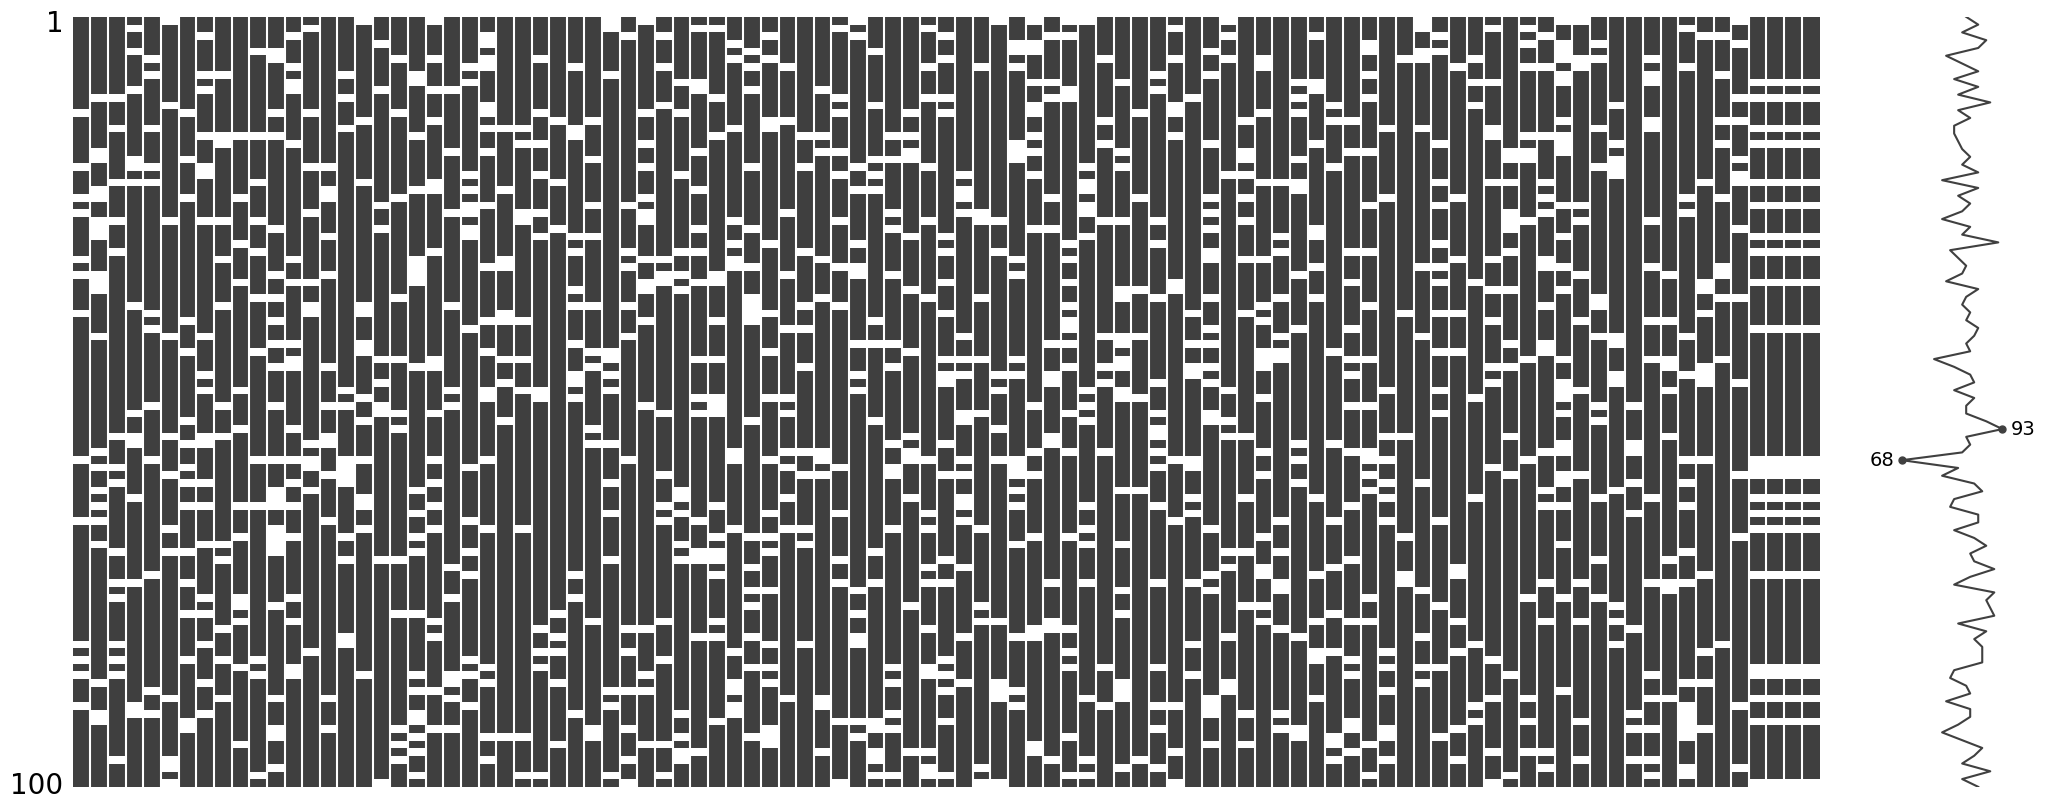

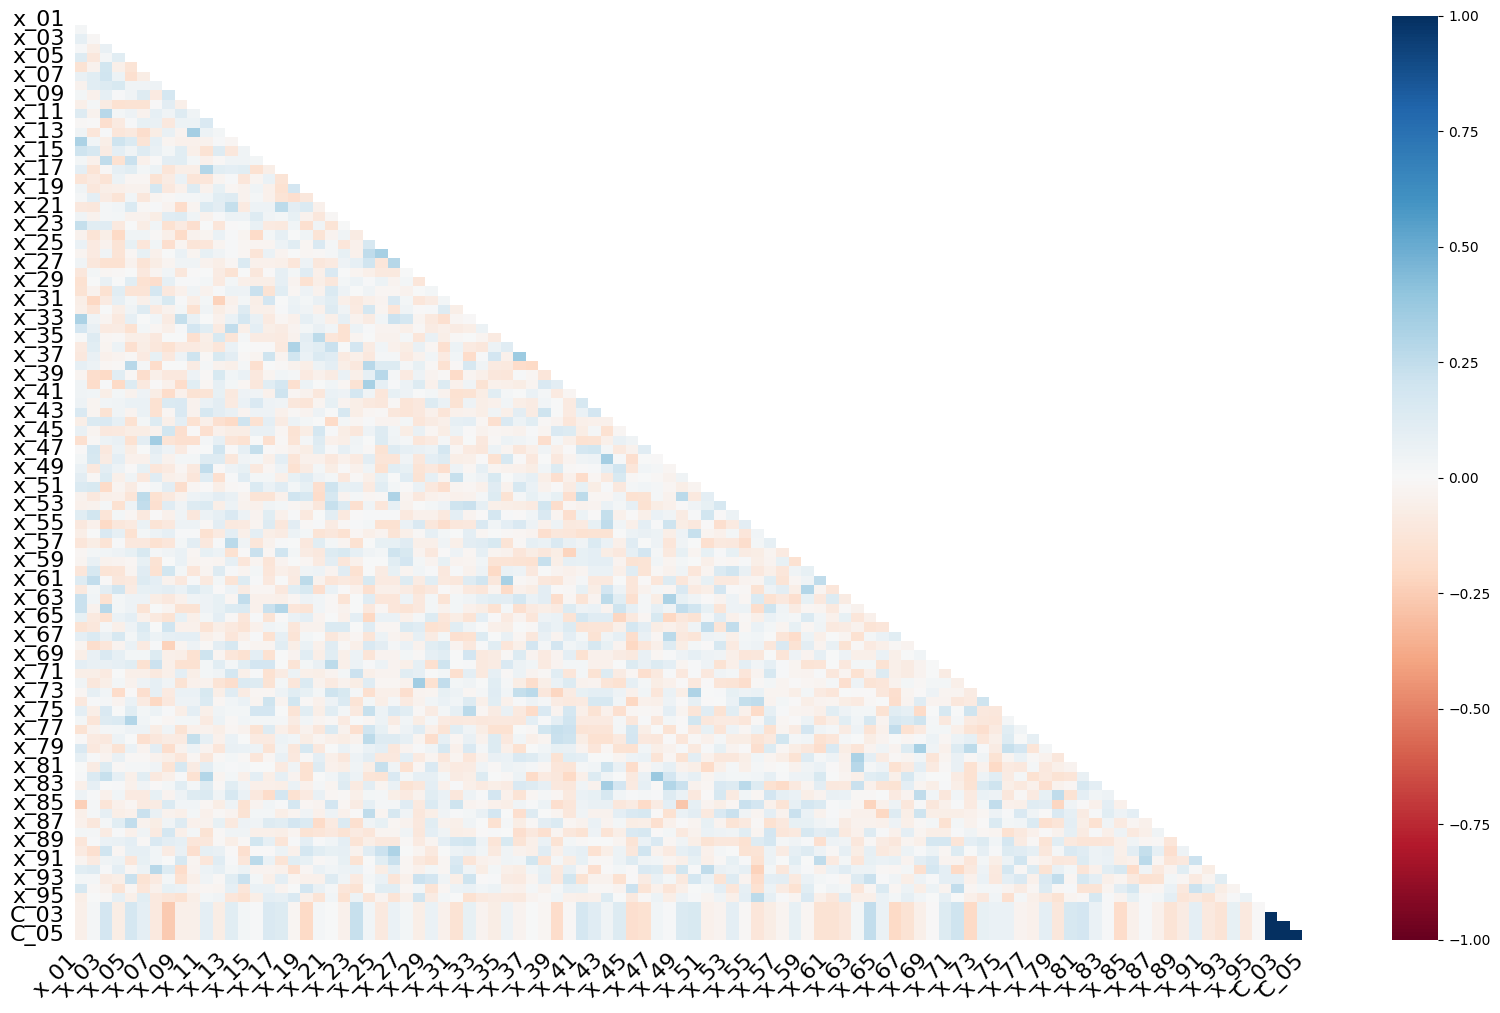

In [11]:
# Visualize missing data patterns
msno.matrix(X)  
plt.show()

msno.heatmap(X, labels=False)  
plt.show()


### Categorical Variables Encoding

One-hot Encoding:

The categorical variables were one-hot encded, which deals with the missing values by creating a new category for them (which is the column that is not added to the dataet). we are creating a new category for the missing values, which preserving information about the absence of data. 

In [12]:
# Handle categorical data - one hot encoding
X = pd.get_dummies(X, columns=categorical_vars) # we dont drop first column as there are missing values
X = X * 1
print(f"X_dummies: {X.shape}")
X.head()

X_dummies: (100, 115)


,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,C_04_71.0,C_04_72.0,C_04_73.0,C_04_74.0,C_04_75.0,C_05_71.0,C_05_72.0,C_05_73.0,C_05_74.0,C_05_75.0
0,6.359019,-13.367120,-2.483750,-6.641891,11.733539,NaN,-17.085361,22.194764,16.827888,-10.367142,...,0,0,1,0,0,0,0,1,0,0
1,3.873664,-8.470389,-3.055012,NaN,11.420983,1.822330,-13.694100,22.738654,20.307503,-2.859097,...,0,0,1,0,0,0,0,1,0,0
2,5.275824,-12.070531,-1.366168,-4.819100,10.721527,-5.125992,-17.476865,NaN,15.963889,-3.257940,...,0,0,0,1,0,0,0,0,1,0
3,4.430110,-4.467975,-0.730736,-10.047104,11.498539,-2.870260,-14.033012,18.225190,10.409488,-5.616061,...,1,0,0,0,0,0,1,0,0,0
4,3.116458,-8.518713,-6.796050,NaN,7.646285,-3.118309,-13.102567,22.801217,16.680208,-3.357765,...,0,0,0,1,0,0,0,0,0,1


In [13]:
categorical_vars = [col for col in X.columns if 'C_' in col]

### Handling Missing Values in numerical data

We tested different mv imputation techniques for the numerical variables and compared the distribution of 5 randomly chosen variables of X before and after each imputation method was applied. 

Impute MVs by mean:

In [14]:
# Impute missing values with mean
X_mean = X.fillna(X.mean())

Impute MVs by median:

In [15]:
# Impute missing values with median
X_median = X.fillna(X.median())

KNN Imputation for MVs:

In [16]:
# KNN Imputation
imputer = KNNImputer(n_neighbors=9) 
X_knn = X.copy()
X_knn.iloc[:, 0:95] = imputer.fit_transform(X_knn.iloc[:, 0:95])

Iterative Imputer

In [17]:
# Iterative Imputation	
imputer = IterativeImputer(max_iter=50, random_state=0)
X_iterative = X.copy()
X_iterative.iloc[:, 0:95] = imputer.fit_transform(X_iterative.iloc[:, 0:95])

X_iterative.head()


,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,C_04_71.0,C_04_72.0,C_04_73.0,C_04_74.0,C_04_75.0,C_05_71.0,C_05_72.0,C_05_73.0,C_05_74.0,C_05_75.0
0,6.359019,-13.367120,-2.483750,-6.641891,11.733539,-6.707070,-17.085361,22.194764,16.827888,-10.367142,...,0,0,1,0,0,0,0,1,0,0
1,3.873664,-8.470389,-3.055012,-5.928229,11.420983,1.822330,-13.694100,22.738654,20.307503,-2.859097,...,0,0,1,0,0,0,0,1,0,0
2,5.275824,-12.070531,-1.366168,-4.819100,10.721527,-5.125992,-17.476865,26.475798,15.963889,-3.257940,...,0,0,0,1,0,0,0,0,1,0
3,4.430110,-4.467975,-0.730736,-10.047104,11.498539,-2.870260,-14.033012,18.225190,10.409488,-5.616061,...,1,0,0,0,0,0,1,0,0,0
4,3.116458,-8.518713,-6.796050,-5.481796,7.646285,-3.118309,-13.102567,22.801217,16.680208,-3.357765,...,0,0,0,1,0,0,0,0,0,1


From the plots, we see that mean and median imputation skew the distributions. KNN and iterative imputation provide more accurate results, with iterative being the best but computationally expensive. Given the small dataset size and the complexity of iterative imputation, we chose KNN for its efficiency in preserving the underlying structure, contrary to mean and meadian imputations, while being computationally more feasible than iterative imputation.

<Figure size 2000x2000 with 0 Axes>

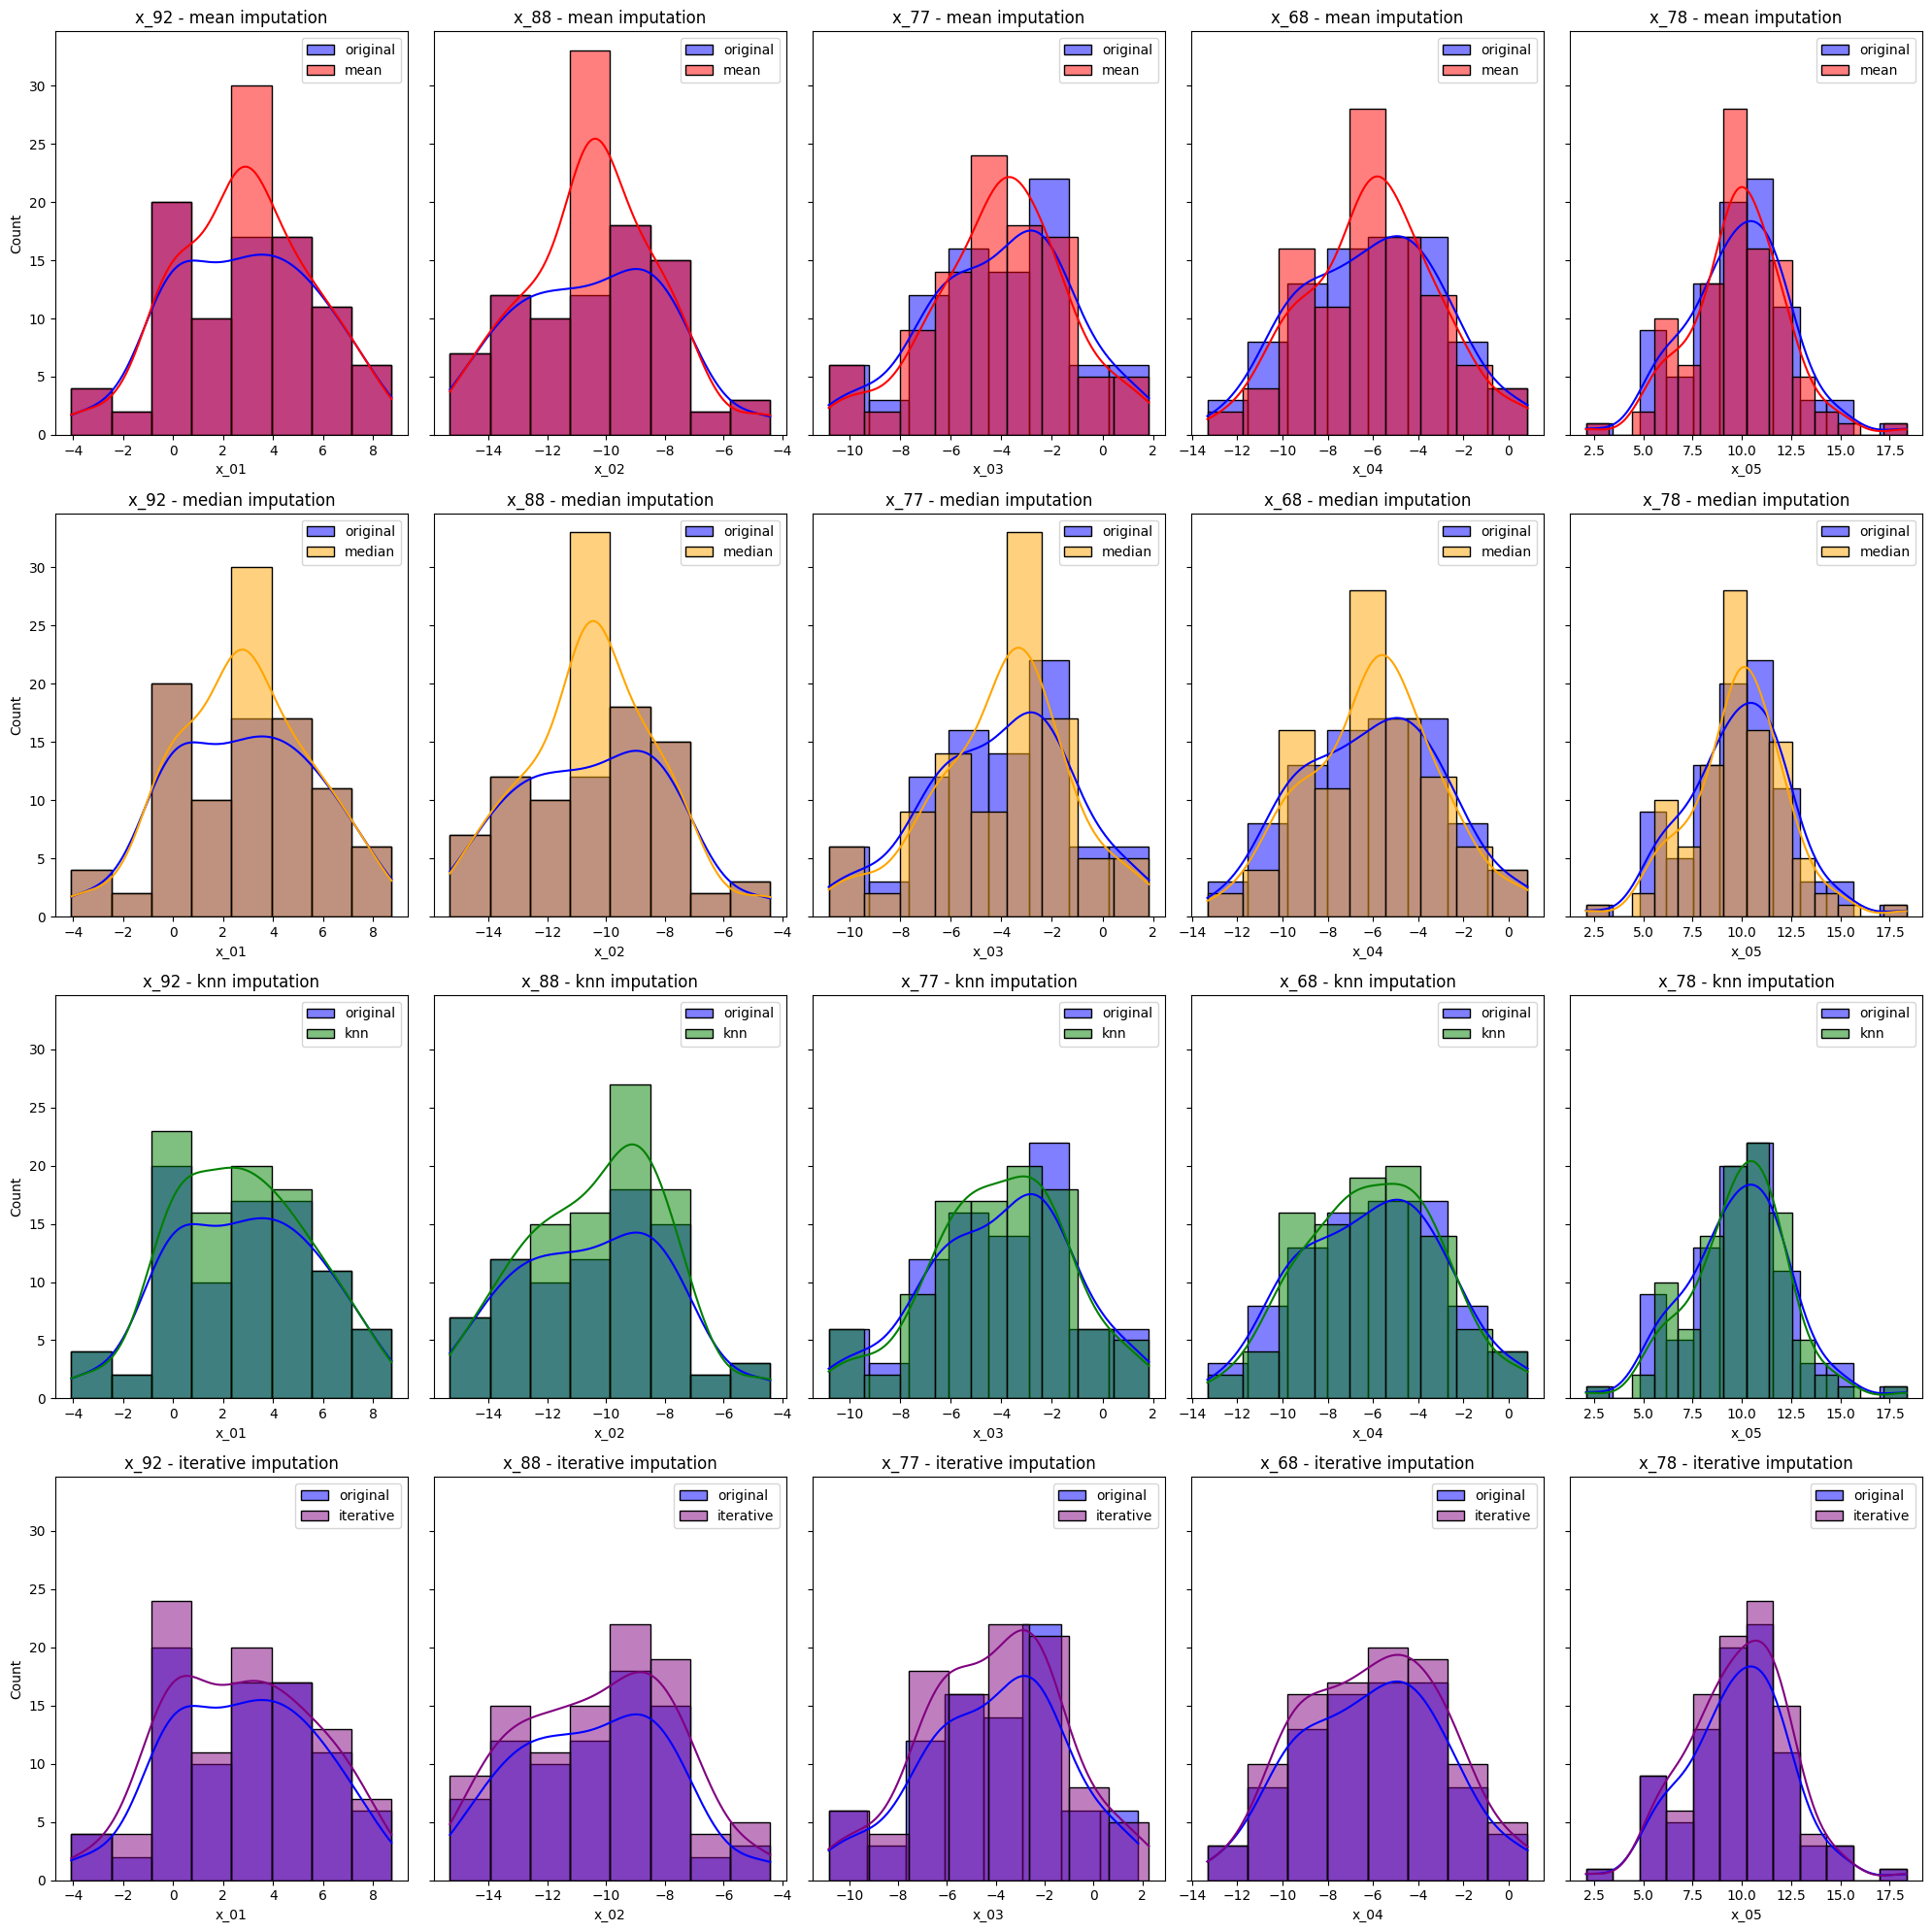

In [18]:
# Compare 5 random variables original distribution vs distribution after different imputation methods
imputation_methods = ['mean', 'median', 'knn', 'iterative'] 
plt.figure(figsize=(20, 20))
fig, axes = plt.subplots(4, 5, figsize=(20, 20), sharey=True)  
selected_features =  random.sample(list(X.drop(columns=categorical_vars).columns), 5)

for row, method in enumerate(imputation_methods):
    for i, feature in enumerate(selected_features):  
        if method == 'knn':
            data = X_knn
            color = 'green'
        elif method == 'mean':
            data = X_mean  
            color = 'red'
        elif method == 'median':
            data = X_median 
            color = 'orange'
        else:
            data = X_iterative  
            color = 'purple'

        sns.histplot(X.iloc[:, i], kde=True, color='blue', label='original', alpha=0.5, ax=axes[row, i])
        sns.histplot(data.iloc[:, i], kde=True, color=color, label=method, alpha=0.5, ax=axes[row, i])
        
        axes[row, i].set_title(f'{feature} - {method} imputation')
        axes[row, i].legend()


plt.tight_layout()
plt.show()


## EDA

We will use the temporarily imputed dataset for Exploratory data analysis.

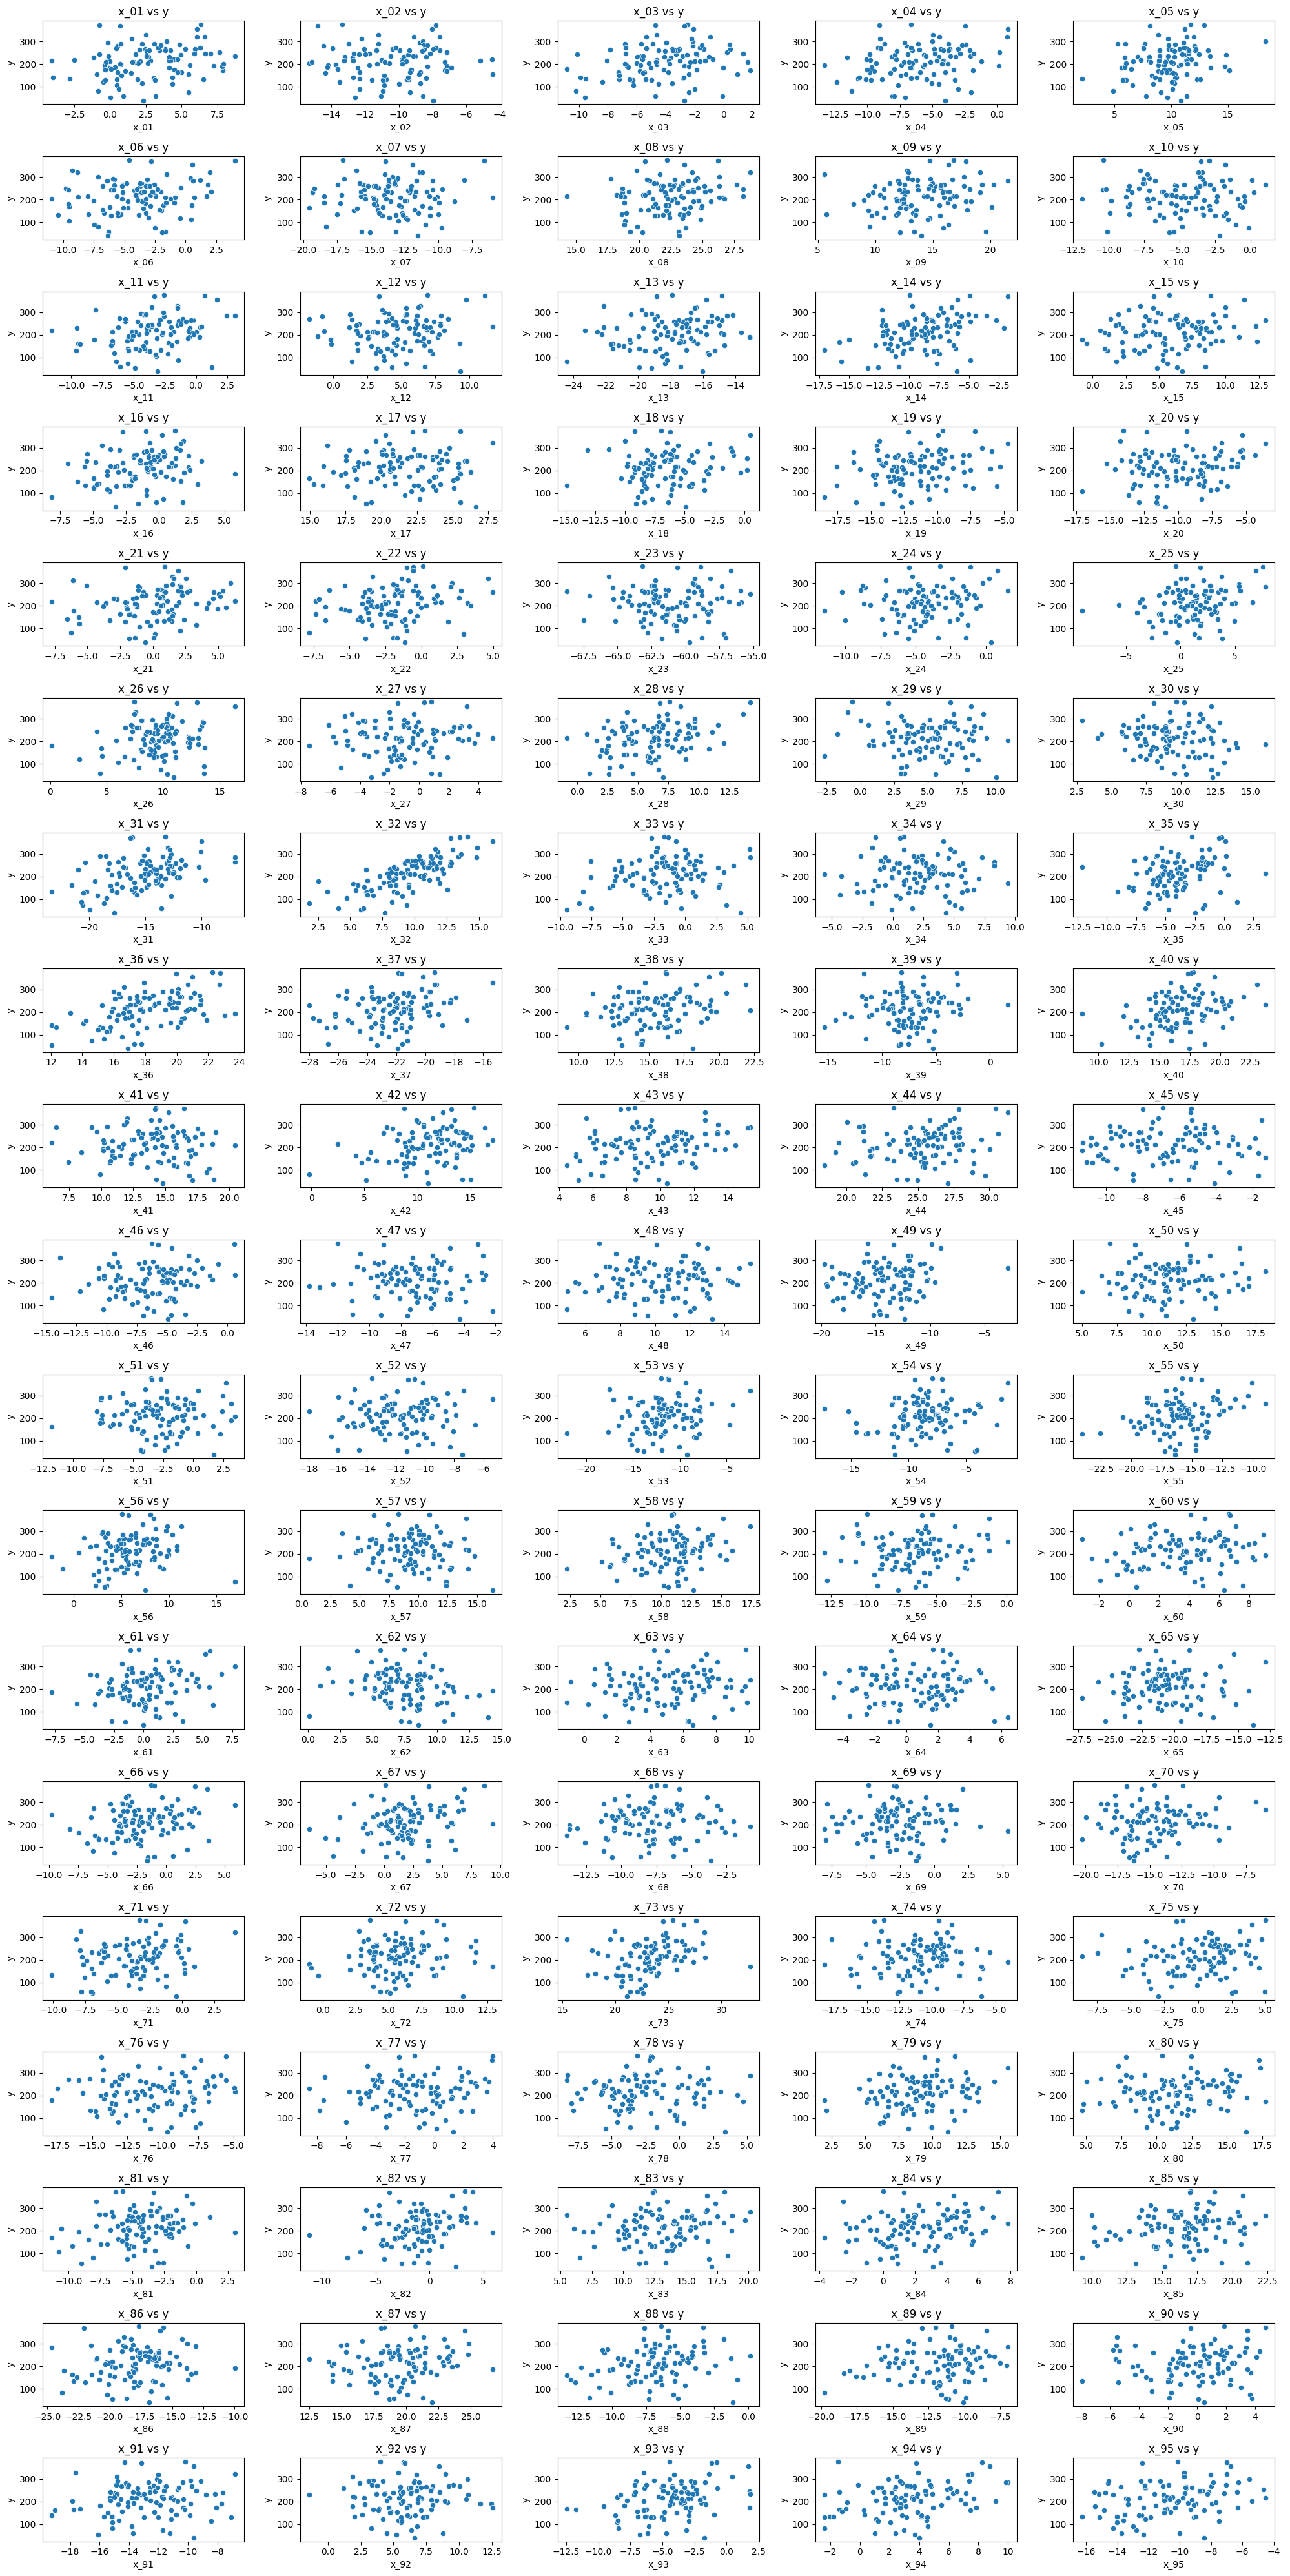

In [19]:
# scatter plots of numerical features vs y
fig, ax = plt.subplots(19, 5, figsize=(20, 40))
for i, col in enumerate(X_knn.drop(columns=categorical_vars).columns):
    sns.scatterplot(x=col, y=y, data=X_knn, ax=ax[i//5, i%5])
    ax[i//5, i%5].set_title(f'{col} vs y')
    ax[i//5, i%5].set_xlabel(col)
    ax[i//5, i%5].set_ylabel('y')
plt.tight_layout()
plt.show()

In the boxplots we can see there's no significant number of outliers and that different variables have different distributions.

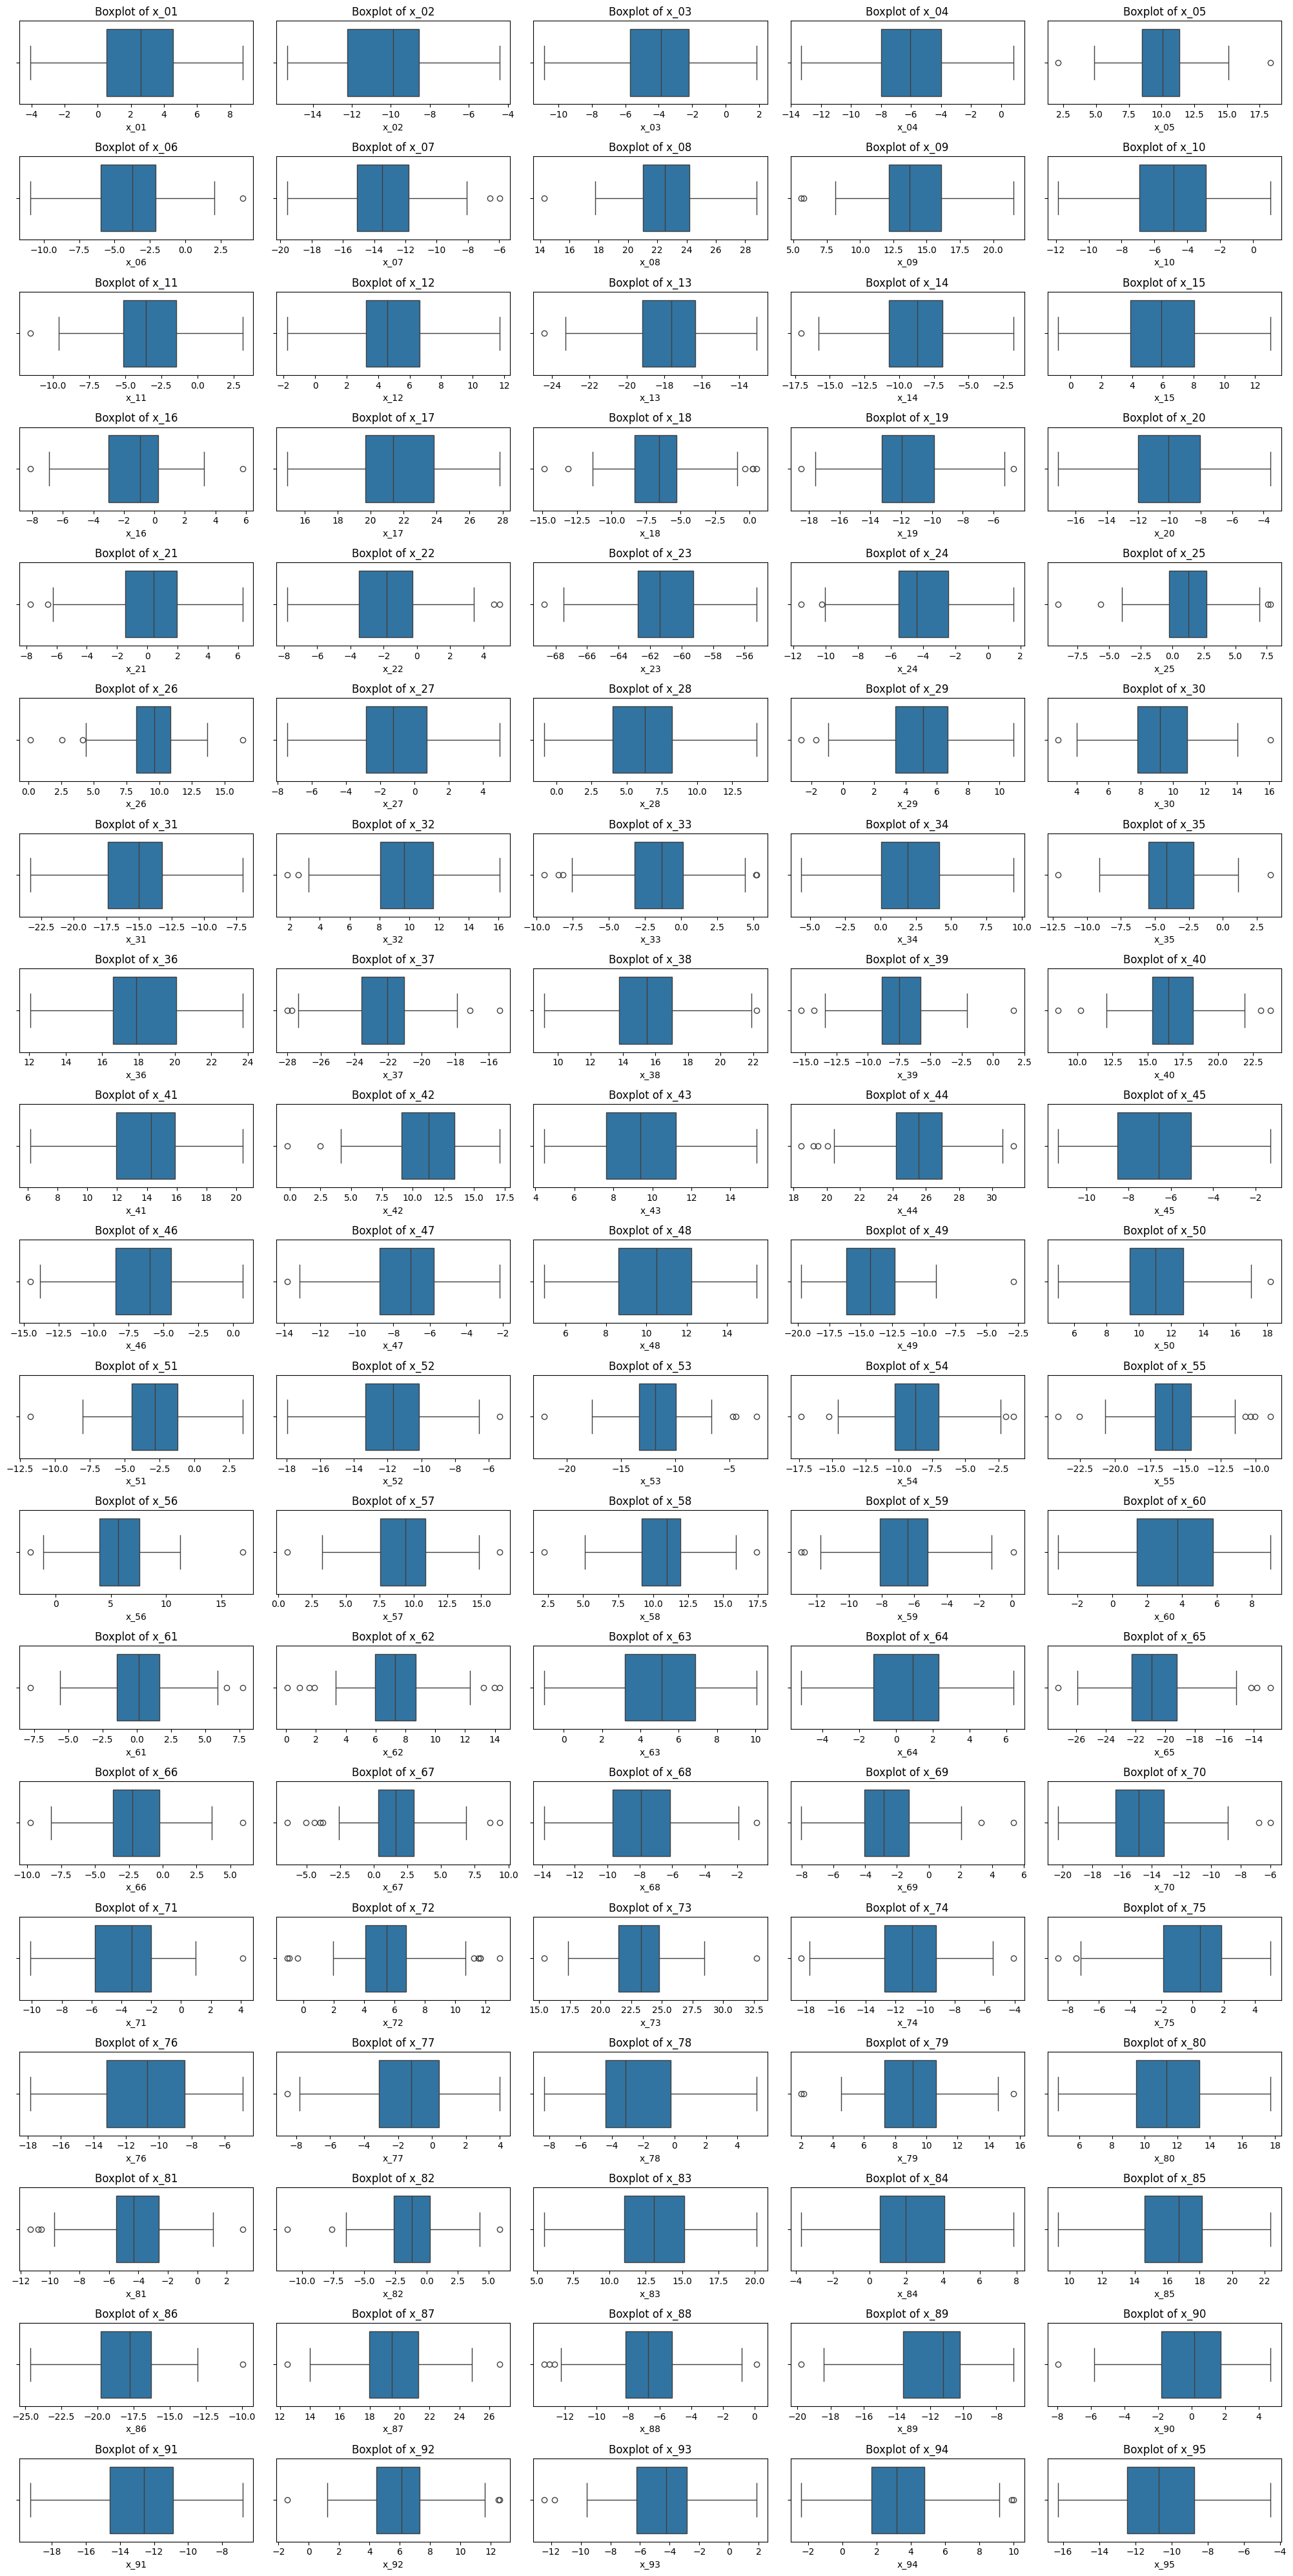

In [20]:
# box plots of numerical features 
fig, ax = plt.subplots(19, 5, figsize=(20, 40))
for i, col in enumerate(X_knn.drop(columns=categorical_vars).columns):
    sns.boxplot(x=col, data=X_knn, ax=ax[i//5, i%5])
    ax[i//5, i%5].set_title(f'Boxplot of {col}')
    ax[i//5, i%5].set_xlabel(col)
plt.tight_layout()
plt.show()

6 pairs of variables have a high correlation coefficient (above 0.7) indicating they are strongly related. -> suggests multicollinearity, that can be addressed by shrikage methods (like Ridge, Lasso or Elastic Net), which reduce the impact of less important variables.

In [21]:
# correlation matrix
corr = X_knn.drop(columns=categorical_vars).corr()

# highly correlated variables:
corr = corr.stack().reset_index()
corr.columns = ['var1', 'var2', 'corr']
corr = corr[corr['var1'] != corr['var2']]
corr = corr[corr['corr'] > 0.7]
print(corr)


      var1  var2      corr
306   x_04  x_22  0.702458
1405  x_15  x_76  0.727737
1998  x_22  x_04  0.702458
3655  x_39  x_46  0.745373
4313  x_46  x_39  0.745373
7139  x_76  x_15  0.727737


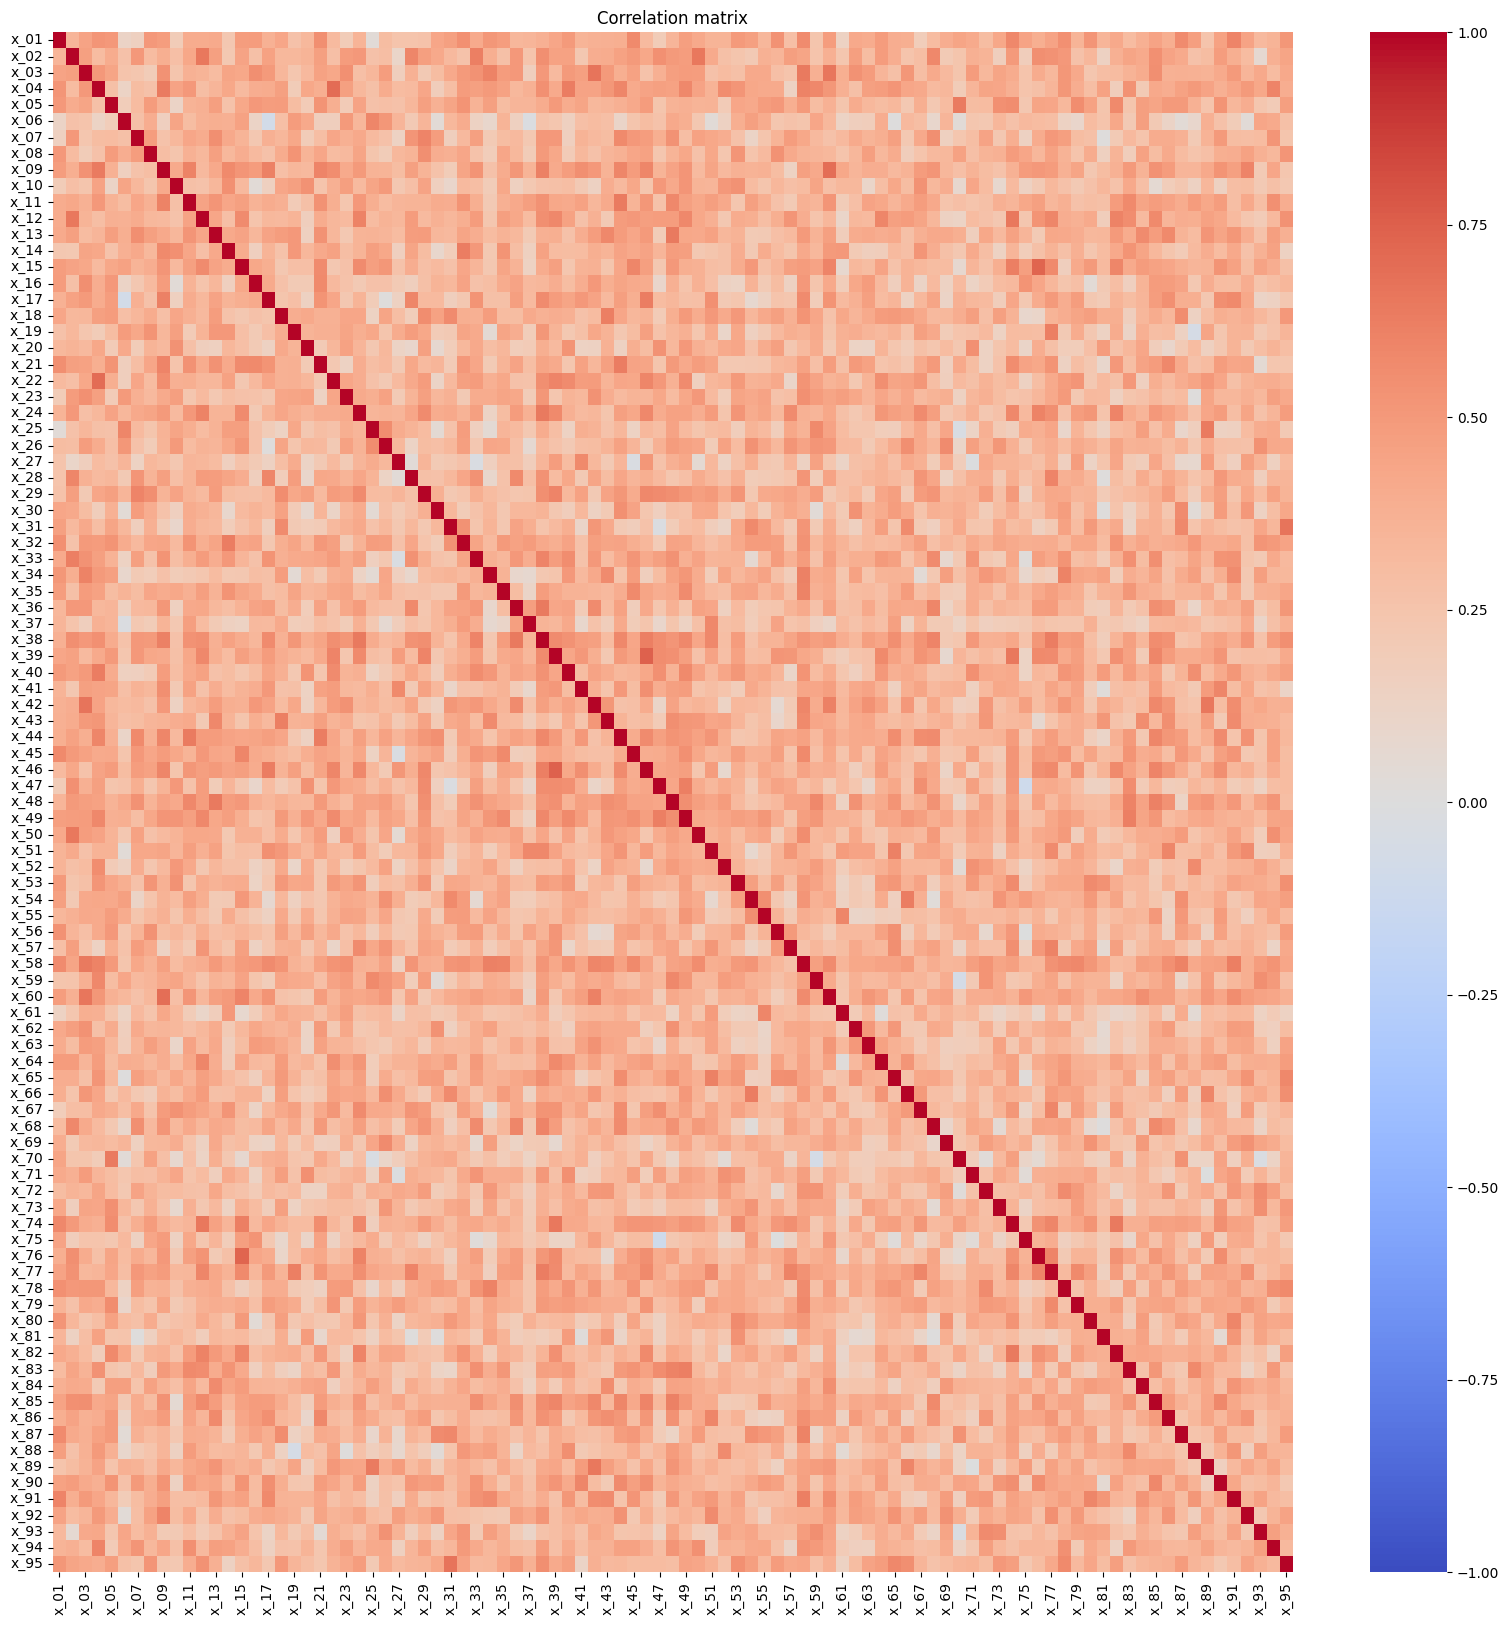

In [22]:
# Correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(X_knn.drop(columns=categorical_vars).corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()


## PCA

Considering the high dimensionality of the data, we checked PCA and found that it retains 95% of the variance with slightly more than 35 components. This indicates that most of the data's variability can be captured in a lower-dimensional space. Therefore, we plan to include PCA in our model selection pipeline.

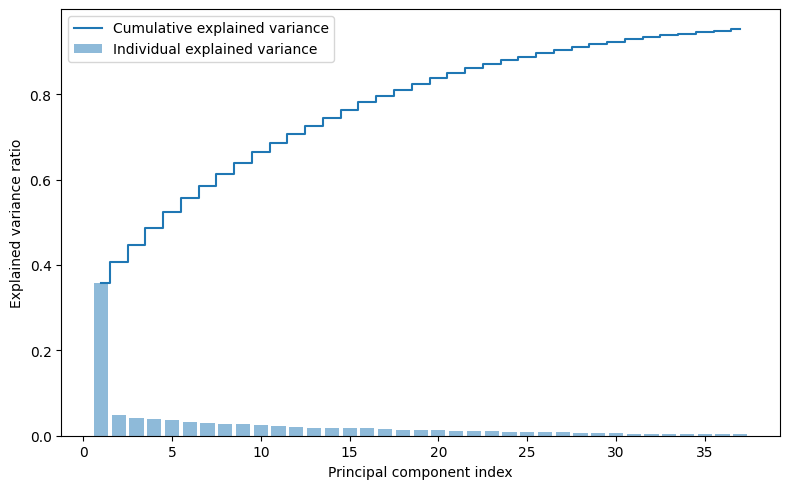

In [23]:
# PCA Analysis
X_PCA = X_knn.values  # Convert the DataFrame to a NumPy array

# Standardize the data
scaler = StandardScaler()
X_PCA[:, 0:95] = scaler.fit_transform(X_PCA[:, 0:95])

pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_PCA = pca.fit_transform(X_PCA)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Model selection

Our model selection and validation process uses a nested cross-validation approach. The outer loop assesses model performance on unseen data, providing a generalized error (mean test RMSE) for each model. The inner loop tunes hyperparameters using GridSearchCV, selecting the optimal parameters based on the last outer loop’s results. This ensures that hyperparameters are chosen without data leakage and minimizes the risk of overfitting. The KNN imputer handles missing values, and all models undergo necessary preprocessing like imputation and scaling. This approach guarantees robust model evaluation.

Due to the curse of dimensionality and potential overfitting, the KNN regressor isn’t ideal when the number of features (p) exceeds the number of observations (n), as in this case. Regularized linear models (Lasso, Ridge, ElasticNet) and Decision Trees are better suited for high-dimensional spaces, as they handle overfitting effectively. Therefore, we tried Lasso, Linear, Ridge, Lars, ElasticNet, and Decision Tree models to address these challenges.

In [24]:
# Define cross-validation folds
k=5
inner_cv = KFold(n_splits=k, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=k, shuffle=True, random_state=40)

# Define models and hyperparameters for grid search
models = {
    #'knn': KNeighborsRegressor(),
    'linear': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'lars': Lars(),
    'elastic_net': ElasticNet(),
    'tree': DecisionTreeRegressor()
}

param_grids = {
    #'knn': {'regressor__n_neighbors': range(1,20), 'regressor__weights': ['distance']},
    'linear': {},
    'ridge': {'regressor__alpha': np.logspace(-1, 2, 50), 'regressor__solver': ['saga'], 'regressor__max_iter': [10000], 'regressor__random_state': [42]},
    'lasso': {'regressor__alpha': np.logspace(-1, 2, 50), 'regressor__random_state': [42], 'regressor__max_iter': [10000], 'regressor__fit_intercept': [True]},
    'lars': {'regressor__n_nonzero_coefs': range(1, 50), 'regressor__fit_path': [False], 'regressor__fit_intercept': [True], 'regressor__verbose': [True], 'regressor__random_state': [42]},
    'elastic_net': {'regressor__alpha': np.logspace(-2, 2, 50), 'regressor__l1_ratio': [0.001] ,  'regressor__fit_intercept': [True], 'regressor__random_state': [42]},
    'tree': {'regressor__max_depth': [3, 5, 10, 15], 'regressor__min_samples_split': [5, 7, 10, 13, 15, 20], 'regressor__random_state': [42]}
}

rmse_train = {model: [] for model in models} # outer CV RMSE for training set
rmse_test = {model: [] for model in models} # outer CV RMSE for test set

# Start outer CV folds
for o, (train_outer_index, test_outer_index) in enumerate(outer_cv.split(X, y)):
    print(f'Outer CV fold {o+1}')
    # Split data into training and test sets for outer CV fold
    X_train_outer, X_test_outer = X.iloc[train_outer_index], X.iloc[test_outer_index]
    y_train_outer, y_test_outer = y.iloc[train_outer_index], y.iloc[test_outer_index]

    best_params = {} # best hyperparameters for each model
    inner_errors_test = {model: [] for model in models} # inner CV mean RMSE for test set
    grid_results = {model: [] for model in models} # all results from grid search
    
    # Start inner CV folds
    for model in models:
        with warnings.catch_warnings(): # disable all the convergence warnings from elastic net
            warnings.simplefilter("ignore")

            print(f'Model: {model}')
            
            # Create the pipeline for preprocessing and model fitting
            pipeline = Pipeline([
                ('imputer', KNNImputer(n_neighbors=9, weights="distance")),  # Imputation
                ('scaler', ColumnTransformer([
                    ('num', StandardScaler(), slice(0, 95))  # Scale only numerical features
                ], remainder='passthrough')),  # Keep categorical features unchanged
                ('regressor', models[model])  # Model
            ])
            
            # Define parameter grid for the model inside the pipeline
            param_grid = param_grids[model]
            
            # GridSearchCV to find the best hyperparameters considering negative RMSE (as GridSearchCV maximizes the score)
            grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=inner_cv, return_train_score=True)
            grid_search.fit(X_train_outer, y_train_outer)

            # Save best hyperparameters and RMSE 
            best_params[model] = grid_search.best_params_
            print(f'Best parameters: {best_params[model]}')
            inner_errors_test[model] = - grid_search.best_score_
            print(f'Best RMSE: {inner_errors_test[model]}')

            grid_results[model] = grid_search.cv_results_  # All results from grid search

    # Impute missing values for outer CV fold
    imputer = KNNImputer(n_neighbors=9, weights="distance")
    X_train_outer = imputer.fit_transform(X_train_outer)
    X_test_outer = imputer.transform(X_test_outer)

    # Feature scaling for outer CV fold
    scaler = StandardScaler()
    X_train_outer[:, 0:95] = scaler.fit_transform(X_train_outer[:, 0:95])
    X_test_outer[:, 0:95] = scaler.transform(X_test_outer[:, 0:95])

    # Fit models with best hyperparameters and calculate RMSE for training and test sets int the outer CV fold
    for model in models:
        print(f'Model: {model}')

        # Set best hyperparameters and model
        best_regressor_params = {k.replace('regressor__', ''): v for k, v in best_params[model].items()}
        regressor = models[model]
        regressor.set_params(**best_regressor_params)

        # Fit model and predict
        regressor.fit(X_train_outer, y_train_outer)
        y_pred_train = regressor.predict(X_train_outer)
        y_pred_test = regressor.predict(X_test_outer)
        
        # Calculate RMSE 
        rmse_train[model].append(np.sqrt(mean_squared_error(y_train_outer, y_pred_train)))
        rmse_test[model].append(np.sqrt(mean_squared_error(y_test_outer, y_pred_test)))

        print(f'RMSE train: {rmse_train[model][-1]}')
        print(f'RMSE test: {rmse_test[model][-1]}')
    

Outer CV fold 1
Model: linear
Best parameters: {}
Best RMSE: 32.87846539849234
Model: ridge
Best parameters: {'regressor__alpha': 3.393221771895328, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 29.995613046028172
Model: lasso
Best parameters: {'regressor__alpha': 1.9306977288832496, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 27.792542520445373
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 16, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 29.71315701166718
Model: elastic_net
Best parameters: {'regressor__alpha': 0.054286754393238594, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 29.976858790598765
Model: tree
Best parameters: {'regressor__max_depth': 3, 'regressor__min_samples_split': 13, 'regressor__random_sta

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+04, tolerance: 4.623e+01
  model = cd_fast.enet_coordinate_descent(


Best parameters: {}
Best RMSE: 35.35651842481341
Model: ridge
Best parameters: {'regressor__alpha': 3.393221771895328, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 33.6679190168968
Model: lasso
Best parameters: {'regressor__alpha': 1.4563484775012436, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 27.512573453699492
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 24, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 28.618011211741326
Model: elastic_net
Best parameters: {'regressor__alpha': 0.04498432668969444, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 33.519219102638374
Model: tree
Best parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 20, 'regressor__random_state': 42}
Best RMSE: 56.998705822

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+04, tolerance: 4.179e+01
  model = cd_fast.enet_coordinate_descent(


Best parameters: {}
Best RMSE: 41.52558864985881
Model: ridge
Best parameters: {'regressor__alpha': 5.963623316594643, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 39.09884750697803
Model: lasso
Best parameters: {'regressor__alpha': 1.6768329368110082, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 32.88409383426291
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 12, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 34.1914164600099
Model: elastic_net
Best parameters: {'regressor__alpha': 0.07906043210907697, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 39.08016980844277
Model: tree
Best parameters: {'regressor__max_depth': 3, 'regressor__min_samples_split': 20, 'regressor__random_state': 42}
Best RMSE: 66.874705717991

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+04, tolerance: 4.342e+01
  model = cd_fast.enet_coordinate_descent(


Best parameters: {}
Best RMSE: 38.95534279120166
Model: ridge
Best parameters: {'regressor__alpha': 5.17947467923121, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 35.49022597651146
Model: lasso
Best parameters: {'regressor__alpha': 2.5595479226995357, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 29.679888740113853
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 19, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 31.615088082837257
Model: elastic_net
Best parameters: {'regressor__alpha': 0.07906043210907697, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 35.469496473075836
Model: tree
Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 7, 'regressor__random_state': 42}
Best RMSE: 64.356529560

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+04, tolerance: 4.003e+01
  model = cd_fast.enet_coordinate_descent(


Best parameters: {}
Best RMSE: 35.05613193046582
Model: ridge
Best parameters: {'regressor__alpha': 1.2648552168552958, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 33.94347610333437
Model: lasso
Best parameters: {'regressor__alpha': 0.8286427728546845, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 28.748533427613758
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 21, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 32.90306475257938
Model: elastic_net
Best parameters: {'regressor__alpha': 0.025595479226995357, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 33.88830293555107
Model: tree
Best parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 20, 'regressor__random_state': 42}
Best RMSE: 46.30998846

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.720e+03, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


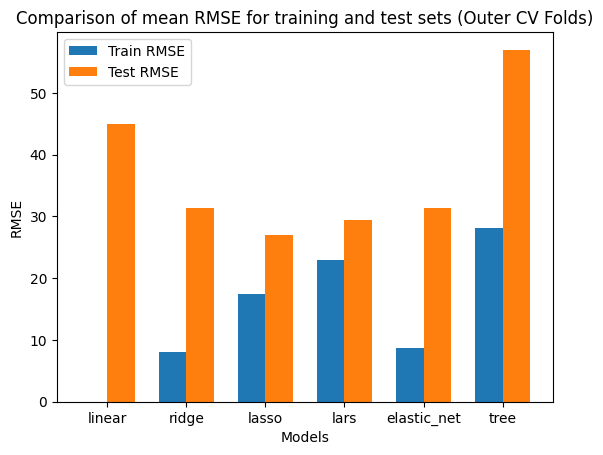

In [25]:
# Plot mean RMSE for training and test sets (Outer CV Folds) for each model 
models_list = list(models.keys())
rmse_train_vals = [np.mean(rmse_train[model]) for model in models_list]
rmse_test_vals = [np.mean(rmse_test[model]) for model in models_list]

x = range(len(models_list))
width = 0.35 
fig, ax = plt.subplots()
bar1 = ax.bar(x, rmse_train_vals, width, label='Train RMSE')
bar2 = ax.bar([p + width for p in x], rmse_test_vals, width, label='Test RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Comparison of mean RMSE for training and test sets (Outer CV Folds)')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(models_list)
ax.legend()

plt.show()

Let's compare the mean RMSE for training and validation sets across different hyperparameter values for each model (inner loop). This will help identifying the optimal hyperparameter setting by visualizing model performance and detecting potential overfitting or underfitting. The vertical dashed line highlights the best parameter value based on validation RMSE.

Linear Regression RMSE - Train: [1.80281108e-13], Validation: [35.05613193]


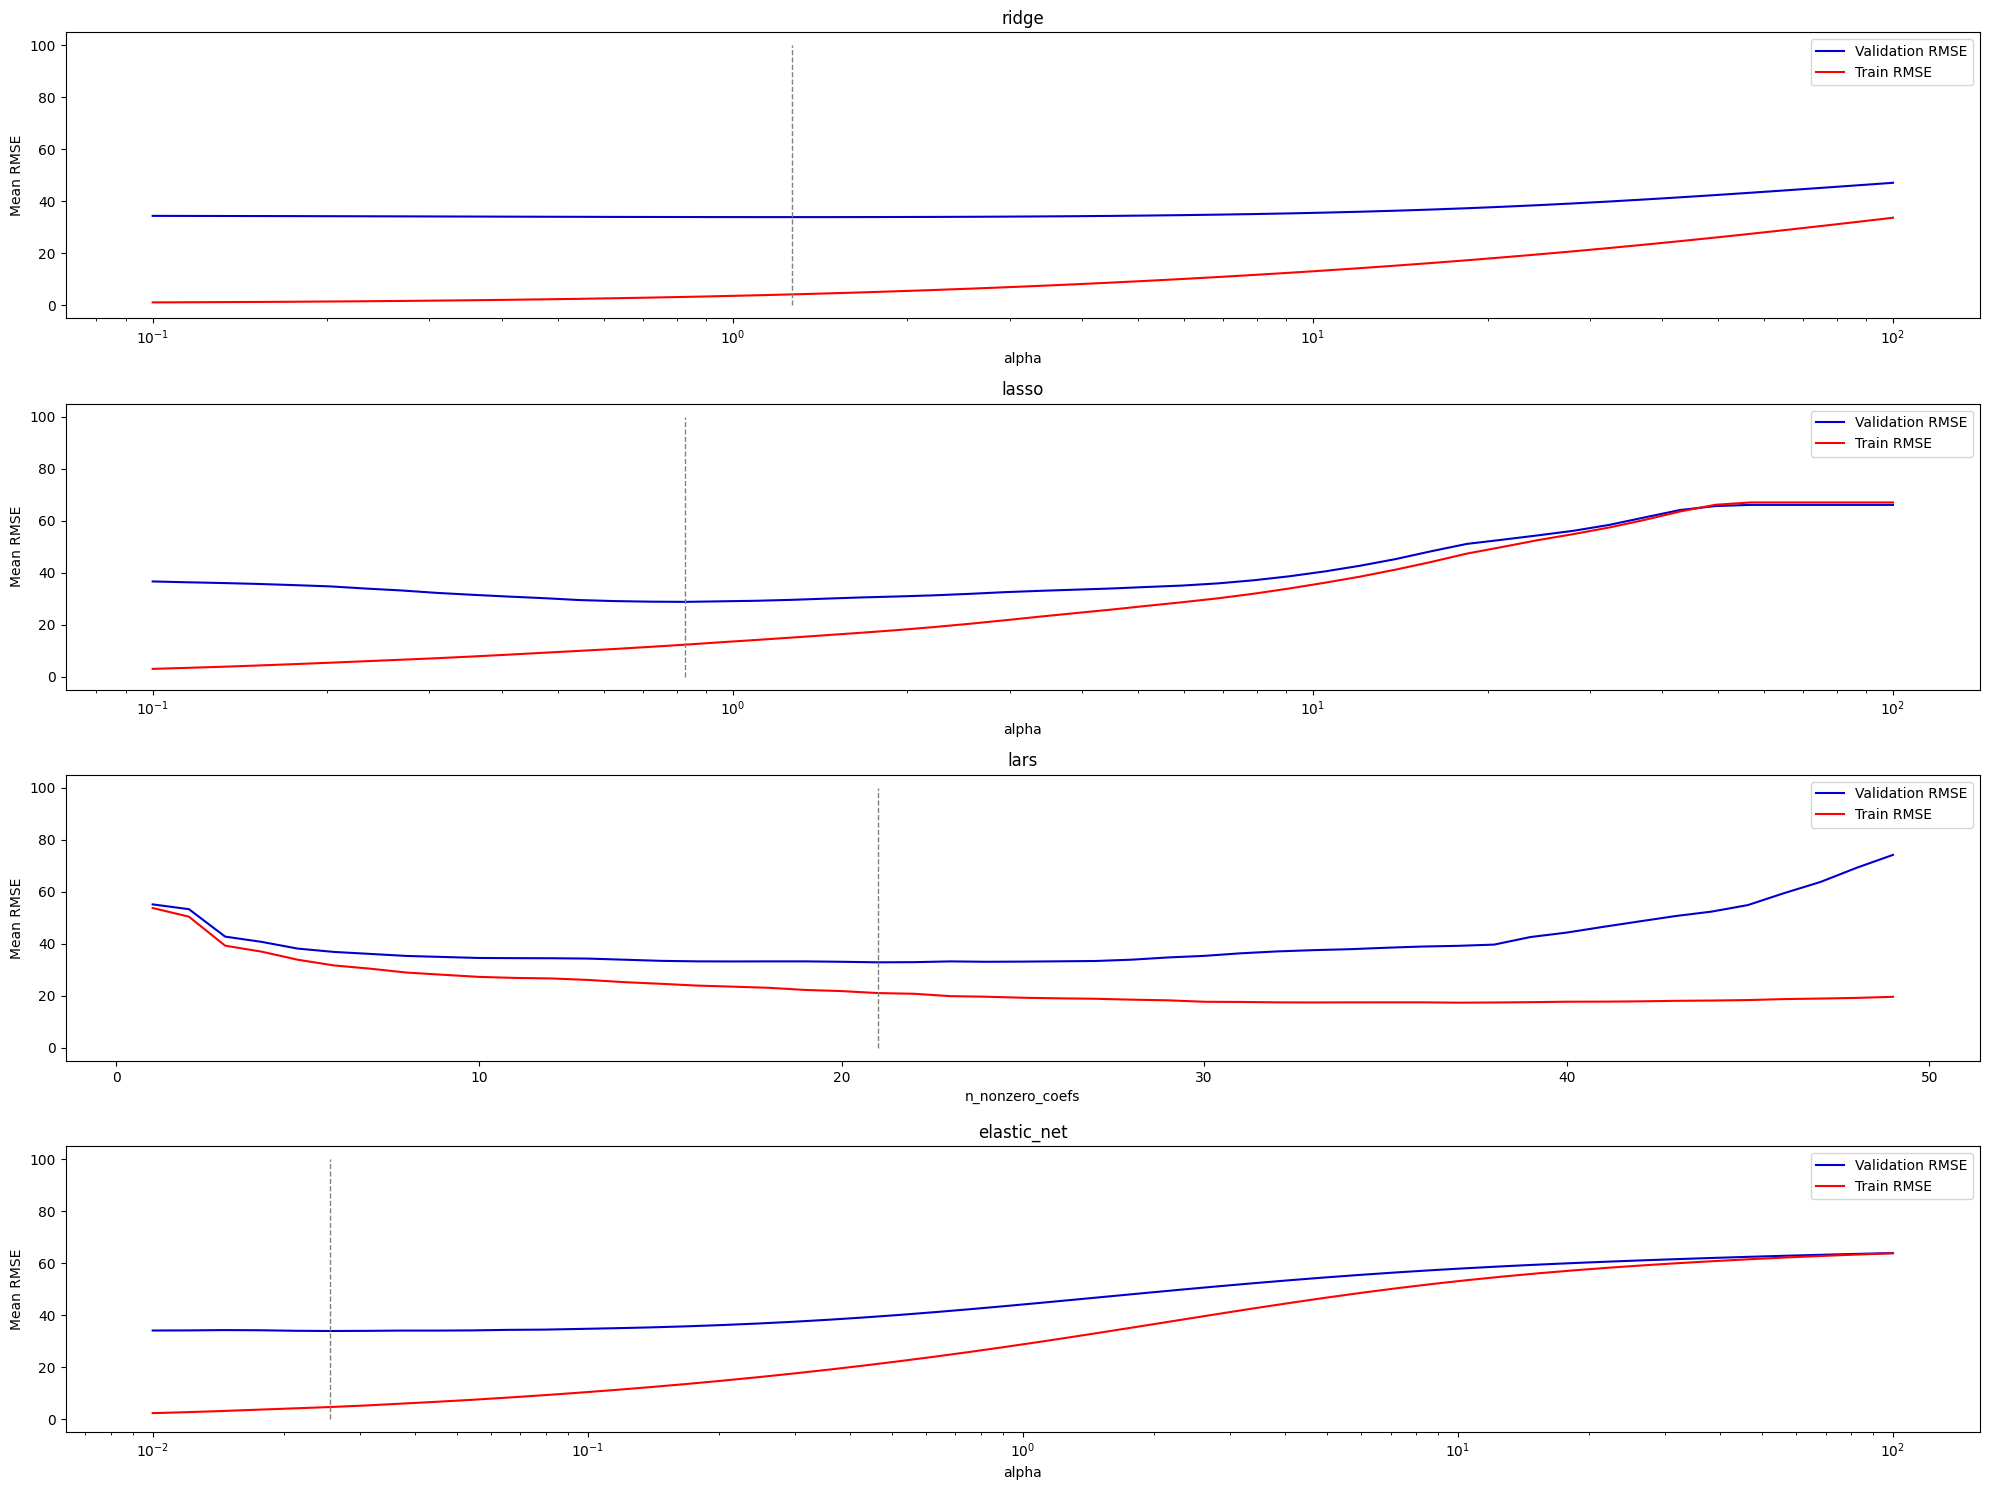

In [26]:
# plot mean RMSE for training and test sets (Last Inner CV Fold) for each model across parameter values
fig, ax = plt.subplots(4, 1, figsize=(20, 15))

# linear
grid_results_model = grid_results['linear']
mean_errors_inner = - grid_results_model['mean_test_score']
mean_train_errors_inner = - grid_results_model['mean_train_score']
print(f"Linear Regression RMSE - Train: {mean_train_errors_inner}, Validation: {mean_errors_inner}")

for i, model in enumerate(models):
    i -= 1
    grid_results_model = grid_results[model]
    mean_errors_inner = - grid_results_model['mean_test_score']
    mean_train_errors_inner = - grid_results_model['mean_train_score']
    if model != 'linear' and model != 'tree':
        # ridge, lasso, elastic_net
        if model == 'ridge' or model == 'lasso' or model == 'elastic_net':
            param_values = grid_results_model['param_regressor__alpha']
            x_label = 'alpha'
            x_scale = 'log' 
        
        # lars
        elif model == 'lars':
            param_values = grid_results_model['param_regressor__n_nonzero_coefs']
            x_label = 'n_nonzero_coefs'
            x_scale = 'linear'

        param_values = np.array(param_values, dtype=float)
        ax[i].plot(param_values, mean_errors_inner, label='Validation RMSE', color='mediumblue')
        ax[i].plot(param_values, mean_train_errors_inner, label='Train RMSE', color='red')
        ax[i].vlines(param_values[np.argmin(mean_errors_inner)], ymin=0, ymax=100, color='grey', linestyle='--', lw=1)

        ax[i].set_title(f'{model}')
        ax[i].set_xlabel(x_label)
        ax[i].set_xscale(x_scale)
        ax[i].set_ylabel('Mean RMSE')
        ax[i].legend()
        

plt.tight_layout()
plt.show()

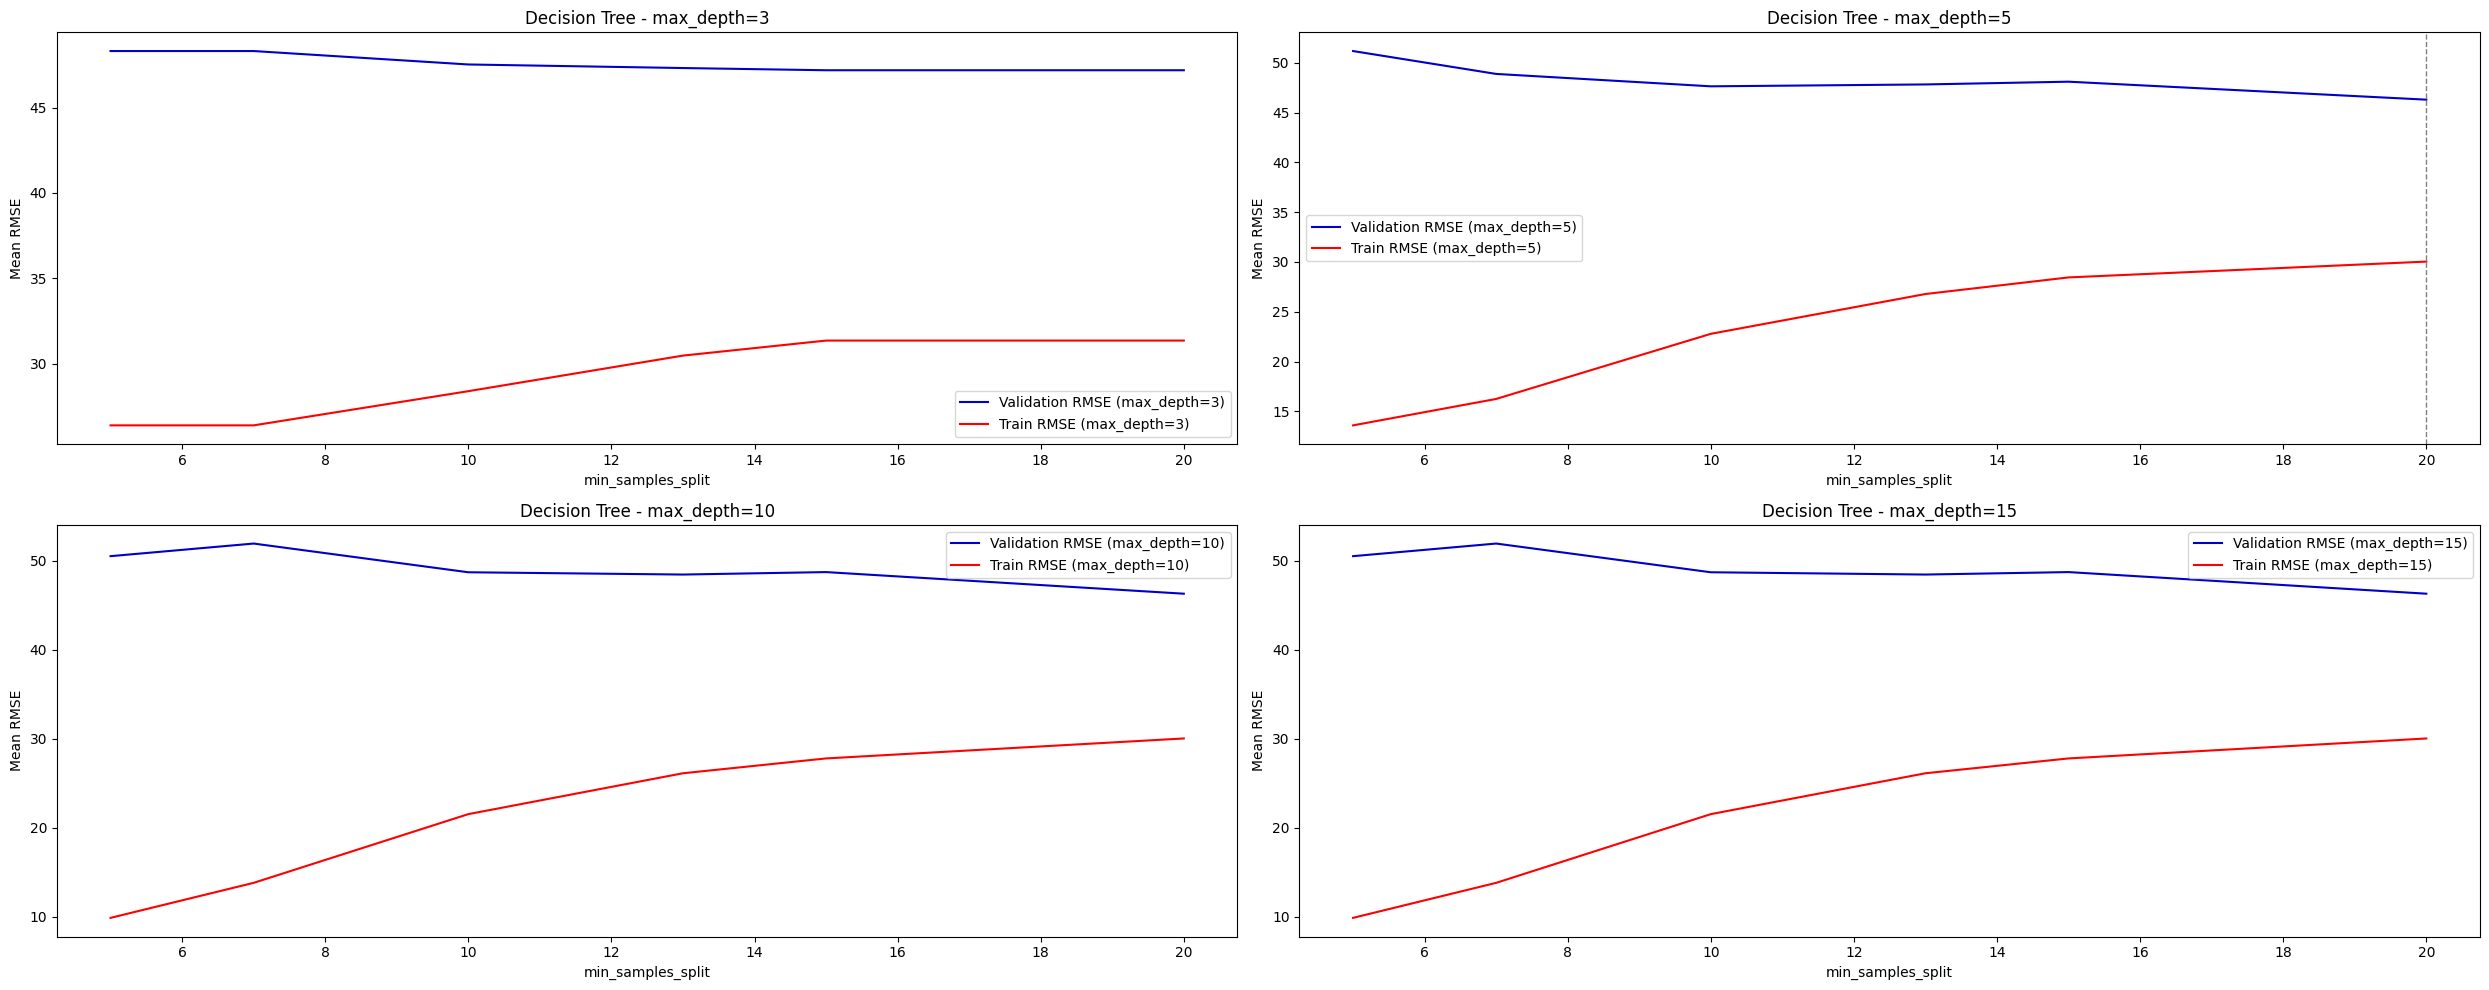

In [27]:
# Create a separate figure for Decision Tree with 2x2 grid
tree_fig, tree_ax = plt.subplots(2, 2, figsize=(25, 10))  # 2x2 grid for decision tree plots
tree_count = 0

# Get grid results for the decision tree model
grid_results_model = grid_results['tree']
mean_errors_inner = -grid_results_model['mean_test_score']
mean_train_errors_inner = -grid_results_model['mean_train_score']

# Extract max_depth and min_samples_split values
max_depth_values = np.unique(grid_results_model['param_regressor__max_depth'])
min_samples_split_values = np.unique(grid_results_model['param_regressor__min_samples_split'])

# Find the optimal parameters from the grid search
best_index = np.argmin(mean_errors_inner)  # Find the index of the best validation score
best_max_depth = grid_results_model['param_regressor__max_depth'][best_index]
best_min_samples_split = grid_results_model['param_regressor__min_samples_split'][best_index]


for max_depth in max_depth_values:
    # Mask for the current max_depth value
    mask_max_depth = (grid_results_model['param_regressor__max_depth'] == max_depth)
    filtered_min_samples_split = grid_results_model['param_regressor__min_samples_split'][mask_max_depth]
    filtered_test_rmse_max_depth = mean_errors_inner[mask_max_depth]
    filtered_train_rmse_max_depth = mean_train_errors_inner[mask_max_depth]

    # Set grid position for 2x2 layout
    row = tree_count // 2
    col = tree_count % 2
    
    filtered_min_samples_split = np.array(filtered_min_samples_split, dtype=float)
    # Plot RMSE for train and test sets for the current max_depth
    tree_ax[row, col].plot(filtered_min_samples_split, filtered_test_rmse_max_depth, label=f'Validation RMSE (max_depth={max_depth})', color='mediumblue')
    tree_ax[row, col].plot(filtered_min_samples_split, filtered_train_rmse_max_depth, label=f'Train RMSE (max_depth={max_depth})', color='red')
    if max_depth == best_max_depth:
        tree_ax[row, col].axvline(best_min_samples_split, color='grey', linestyle='--', lw=1)

    # Set plot titles and labels
    tree_ax[row, col].set_title(f'Decision Tree - max_depth={max_depth}')
    tree_ax[row, col].set_xlabel('min_samples_split')
    tree_ax[row, col].set_ylabel('Mean RMSE')
    tree_ax[row, col].legend()

    
    tree_count += 1

# Adjust layout and show the figure
tree_fig.tight_layout()
plt.show()


Comparing the performance of the different models, it seems obvious that the simple **linear regression** is not a good option, as it is in clear overfitting with a train RMSE close to 0 but a validation error of approximately 35. 

The **Ridge regression** shows relatively stable RMSE values but exhibits a consistent gap between training and validation RMSE, suggesting some degree of overfitting. The validation RMSE increases with the alpha, indicating that more regularization worsens the performance. 

The **Elastic Net** follows a similar trend, but its validation RMSE remains higher across most alpha values, making it a less optimal choice. 

**Lars** initially shows a decrease in RMSE but eventually leads to worse generalization as more coefficients are included, causing the validation RMSE to rise while the train one decreases, showing clear overfitting. However, it still seems like a good option for the optimal number of coefficients, with low rMSe and no signs of overfitting as the train and test are similar. 

The **Lasso** achieves the overall lowest validation RMSE at an optimal alpha showing a better performance. Unlike Ridge, it performs feature selection, reducing overfitting. Compared to Lars, it generalizes better with lower validation error. 

The **Decision Tree** models present worse overall results, with high validation RMSE for all configurations and a considerable gap between the train and the validation RMSE, indicating overfitting, even fort he one with optimal parameters. 

Therefore, the selected model was Lasso, as it achieves the lowest validation RMSE while preventing overfitting through feature selection. Given its balance between predictive accuracy and model simplicity, Lasso with optimal parameters is the best choice.

In [28]:
best_model_name = 'lasso'

To select a final alpha parameter for the Lasso model, we apply the **one standard error rule** to choose a more regularized model. This rule suggests selecting the simplest model whose error is no more than one standard error above the error of the best model, helping to prevent overfitting while maintaining performance. In this case, a higher alpha value leads to more regularization, making the model simpler by shrinking the coefficients toward zero.

Best parameters lasso: 0.8286427728546845
RMSE best lasso: 28.748533427613758
Final parameters lasso (one std rule): 1.9306977288832496
RMSE final lasso (one std rule): 30.835326536454733


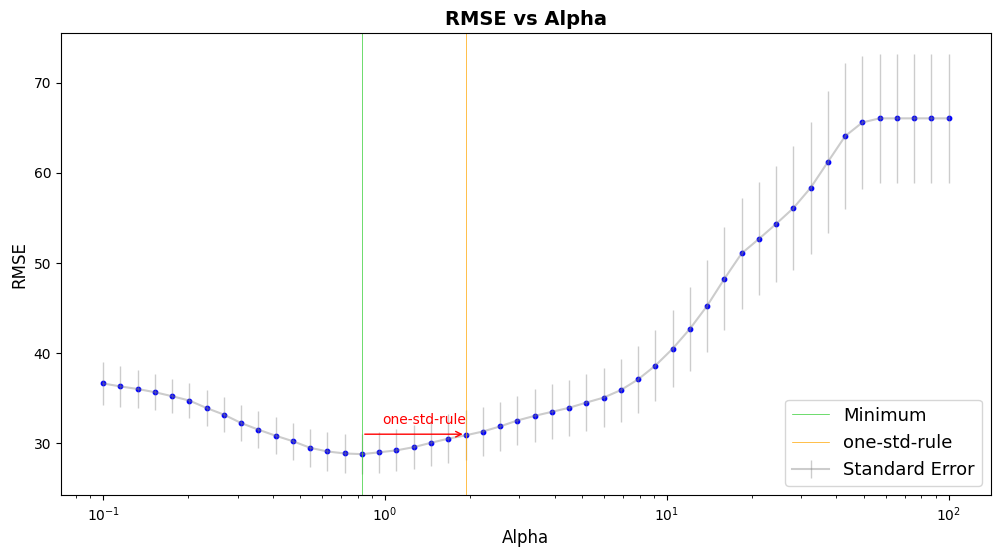

In [29]:
grid_search_best = grid_results[best_model_name] # results from the lasso model from the previous analysis

mean_inner_errors = - grid_search_best['mean_test_score'] # mean RMSE for inner CV folds
std_mean_error = grid_search_best['std_test_score'] # standard deviation of RMSE for inner CV folds

jopt = np.argmax(grid_search_best['mean_test_score']) # index of the best RMSE
sem = std_mean_error / np.sqrt(k)  # Standard error of the mean
best_rmse_best = mean_inner_errors[jopt] # best RMSE for inner CV folds
best_alpha_best = grid_search_best['params'][jopt]['regressor__alpha'] # best alpha value

# Calculate the one standard error rule
J = np.where(mean_inner_errors[jopt] + sem[jopt] > mean_inner_errors)[0]
j = int(J[-1])
best_alpha_one_std = grid_search_best['param_regressor__alpha'][j] 

# Print best parameters and RMSE
print(f"Best parameters lasso: {best_alpha_best}")
print(f"RMSE best lasso: {best_rmse_best}")
print(f"Final parameters lasso (one std rule): {best_alpha_one_std}")
print(f"RMSE final lasso (one std rule): {mean_inner_errors[j]}")

# Plot RMSE vs Alpha
plt.figure(figsize=(12, 6))

# Extract mean rmse values, alphas and standard errors of the mean
alphas = np.array([params['regressor__alpha'] for params in grid_search_best['params']])

# Plot RMSE with error bars
plt.errorbar(alphas, mean_inner_errors, yerr=sem, fmt='', 
             elinewidth=1, color='gray', alpha=0.4, label='Standard Error')

# Scatter plot for mean RMSE values
plt.scatter(alphas, mean_inner_errors, color='blue', s=10)

# Vertical lines for best alpha values
plt.axvline(best_alpha_best, color='limegreen', linestyle='-', linewidth=0.5, label='Minimum')
plt.axvline(best_alpha_one_std, color='orange', linestyle='-', linewidth=0.5, label='one-std-rule')

# Horizontal line for one standard error rule
plt.annotate('one-std-rule', 
             xy=((best_alpha_one_std + best_alpha_best) / 2,  
                 best_rmse_best + sem[jopt]),  # Positioning the text in the middle of the arrow
             xytext=(0, 5),  # Small offset
             textcoords='offset points',
             ha='center', va='bottom',
             fontsize=10, color='red')

plt.annotate('',  # No text for the arrow
             xy=(best_alpha_one_std, best_rmse_best + sem[jopt]), 
             xytext=(best_alpha_best, best_rmse_best + sem[jopt]), 
             arrowprops=dict(arrowstyle='->', color='red', lw=1))

# Labels, title, and formatting
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('RMSE vs Alpha', fontsize=14, fontweight='bold')
plt.xscale('log')  # Log scale for alpha
plt.legend(fontsize=13, loc='lower right')

# Show plot
plt.show()


----------------

We decided to try including PCA in our pipeline of model selection because high-dimensional data can suffer from the curse of dimensionality, leading to overfitting or longer training times.

In [36]:
rmse_train_pca = {model: [] for model in models} # outer CV RMSE for training set
rmse_test_pca = {model: [] for model in models} # outer CV RMSE for test set

# Start outer CV folds
for o, (train_outer_index, test_outer_index) in enumerate(outer_cv.split(X, y)):
    print(f'Outer CV fold {o+1}')
    # Split data into training and test sets for outer CV fold
    X_train_outer, X_test_outer = X.iloc[train_outer_index], X.iloc[test_outer_index]
    y_train_outer, y_test_outer = y.iloc[train_outer_index], y.iloc[test_outer_index]

    best_params_pca = {} # best hyperparameters for each model
    inner_errors_test_pca = {model: [] for model in models} # inner CV mean RMSE for test set
    grid_results_pca = {model: [] for model in models} # all results from grid search
    
    # Start inner CV folds
    for model in models:
        with warnings.catch_warnings(): # disable all the convergence warnings from elastic net
            warnings.simplefilter("ignore")

            print(f'Model: {model}')
            
            # Create the pipeline for preprocessing and model fitting
            pipeline_pca = Pipeline([
                ('imputer', KNNImputer(n_neighbors=9, weights="distance")),  # Imputation
                ('scaler', ColumnTransformer([
                    ('num', StandardScaler(), slice(0, 95))  # Scale only numerical features
                ], remainder='passthrough')),  # Keep categorical features unchanged
                ('pca', PCA(n_components=0.95)),  # PCA	
                ('regressor', models[model])  # Model
            ])
            
            # Define parameter grid for the model inside the pipeline
            param_grid = param_grids[model]
            
            # GridSearchCV to find the best hyperparameters considering negative RMSE (as GridSearchCV maximizes the score)
            grid_search_pca = GridSearchCV(pipeline_pca, param_grid, scoring='neg_root_mean_squared_error', cv=inner_cv, return_train_score=True)
            grid_search_pca.fit(X_train_outer, y_train_outer)

            # Save best hyperparameters and RMSE 
            best_params_pca[model] = grid_search_pca.best_params_
            print(f'Best parameters: {best_params_pca[model]}')
            inner_errors_test_pca[model] = - grid_search_pca.best_score_
            print(f'Best RMSE: {inner_errors_test_pca[model]}')

            grid_results_pca[model] = grid_search_pca.cv_results_  # All results from grid search

    # Impute missing values for outer CV fold
    imputer = KNNImputer(n_neighbors=9, weights="distance")
    X_train_outer = imputer.fit_transform(X_train_outer)
    X_test_outer = imputer.transform(X_test_outer)

    # Feature scaling for outer CV fold
    scaler = StandardScaler()
    X_train_outer[:, 0:95] = scaler.fit_transform(X_train_outer[:, 0:95])
    X_test_outer[:, 0:95] = scaler.transform(X_test_outer[:, 0:95])

    # Fit models with best hyperparameters and calculate RMSE for training and test sets int the outer CV fold
    for model in models:
        print(f'Model: {model}')

        # Set best hyperparameters and model
        best_regressor_params_pca = {k.replace('regressor__', ''): v for k, v in best_params_pca[model].items()}
        regressor = models[model]
        regressor.set_params(**best_regressor_params_pca)

        # Fit model and predict
        regressor.fit(X_train_outer, y_train_outer)
        y_pred_train = regressor.predict(X_train_outer)
        y_pred_test = regressor.predict(X_test_outer)
        
        # Calculate RMSE 
        rmse_train_pca[model].append(np.sqrt(mean_squared_error(y_train_outer, y_pred_train)))
        rmse_test_pca[model].append(np.sqrt(mean_squared_error(y_test_outer, y_pred_test)))

        print(f'RMSE train: {rmse_train_pca[model][-1]}')
        print(f'RMSE test: {rmse_test_pca[model][-1]}')
    

Outer CV fold 1
Model: linear
Best parameters: {}
Best RMSE: 37.948619960901745
Model: ridge
Best parameters: {'regressor__alpha': 0.1, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 37.950370292843715
Model: lasso
Best parameters: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 38.024180880139866
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 32, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 37.94861996090174
Model: elastic_net
Best parameters: {'regressor__alpha': 0.01, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 37.972852109277525
Model: tree
Best parameters: {'regressor__max_depth': 3, 'regressor__min_samples_split': 20, 'regressor__random_state': 42}
Best RMSE: 83.36486332239016
Model:

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.655e+03, tolerance: 4.623e+01
  model = cd_fast.enet_coordinate_descent(


Best parameters: {}
Best RMSE: 37.37152669137411
Model: ridge
Best parameters: {'regressor__alpha': 0.1, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 37.37816473439187
Model: lasso
Best parameters: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 37.46640591338217
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 32, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 37.37152669137408
Model: elastic_net
Best parameters: {'regressor__alpha': 0.01, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 37.415934785965035
Model: tree
Best parameters: {'regressor__max_depth': 3, 'regressor__min_samples_split': 20, 'regressor__random_state': 42}
Best RMSE: 70.3535123497689
Model: linear
RMSE train: 3.692857462824

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.500e+03, tolerance: 4.179e+01
  model = cd_fast.enet_coordinate_descent(


Best parameters: {}
Best RMSE: 42.393659329116076
Model: ridge
Best parameters: {'regressor__alpha': 3.906939937054617, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 42.27657980535087
Model: lasso
Best parameters: {'regressor__alpha': 0.47148663634573934, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 42.29717620502929
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 30, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 41.60990519272273
Model: elastic_net
Best parameters: {'regressor__alpha': 0.054286754393238594, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 42.28330157366277
Model: tree
Best parameters: {'regressor__max_depth': 3, 'regressor__min_samples_split': 7, 'regressor__random_state': 42}
Best RMSE: 80.231724101

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+04, tolerance: 4.342e+01
  model = cd_fast.enet_coordinate_descent(


Best parameters: {}
Best RMSE: 40.976673743327886
Model: ridge
Best parameters: {'regressor__alpha': 4.498432668969446, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 40.82548961608084
Model: lasso
Best parameters: {'regressor__alpha': 0.8286427728546845, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 40.48731705673028
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 29, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 40.045347679532476
Model: elastic_net
Best parameters: {'regressor__alpha': 0.0655128556859551, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 40.83311652861813
Model: tree
Best parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 5, 'regressor__random_state': 42}
Best RMSE: 86.01061254258

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+04, tolerance: 4.003e+01
  model = cd_fast.enet_coordinate_descent(


Best parameters: {}
Best RMSE: 39.80098190815272
Model: ridge
Best parameters: {'regressor__alpha': 0.1, 'regressor__max_iter': 10000, 'regressor__random_state': 42, 'regressor__solver': 'saga'}
Best RMSE: 39.801876908166165
Model: lasso
Best parameters: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True, 'regressor__max_iter': 10000, 'regressor__random_state': 42}
Best RMSE: 39.83516781038584
Model: lars
Best parameters: {'regressor__fit_intercept': True, 'regressor__fit_path': False, 'regressor__n_nonzero_coefs': 32, 'regressor__random_state': 42, 'regressor__verbose': True}
Best RMSE: 39.80098190815272
Model: elastic_net
Best parameters: {'regressor__alpha': 0.01, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.001, 'regressor__random_state': 42}
Best RMSE: 39.811598788824774
Model: tree
Best parameters: {'regressor__max_depth': 3, 'regressor__min_samples_split': 20, 'regressor__random_state': 42}
Best RMSE: 79.52976997717664
Model: linear
RMSE train: 1.4955405535

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.190e+03, tolerance: 3.611e+01
  model = cd_fast.enet_coordinate_descent(


However, we can clearly see all the results were considerably worse so we did not explore this further.

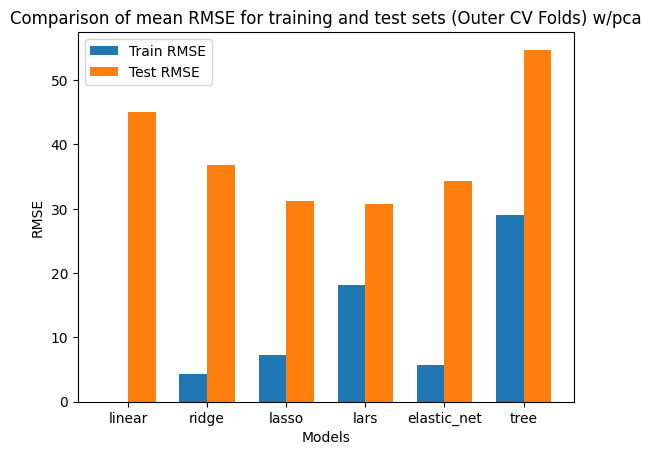

In [37]:
# Plot mean RMSE for training and test sets (Outer CV Folds) for each model 
rmse_train_vals_pca = [np.mean(rmse_train_pca[model]) for model in models_list]
rmse_test_vals_pca = [np.mean(rmse_test_pca[model]) for model in models_list]


x = range(len(models_list))
width = 0.35 
fig, ax = plt.subplots()
bar1 = ax.bar(x, rmse_train_vals_pca, width, label='Train RMSE')
bar2 = ax.bar([p + width for p in x], rmse_test_vals_pca, width, label='Test RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Comparison of mean RMSE for training and test sets (Outer CV Folds) w/pca')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(models_list)
ax.legend()

plt.show()

In [40]:
# print mean RMSE for validation sets (Last Inner CV Fold) for each model for optimal parameters w/pca
print("Mean RMSE (Last Inner CV Fold) for each model for optimal parameters w/pca")
for model in models:
    print(f"{model}: {inner_errors_test_pca[model]}")


Mean RMSE (Last Inner CV Fold) for each model for optimal parameters w/pca
linear: 39.80098190815272
ridge: 39.801876908166165
lasso: 39.83516781038584
lars: 39.80098190815272
elastic_net: 39.811598788824774
tree: 79.52976997717664


------------------

## Xnew - Model Predictions

Now that we have selected our final model, we will try predicting y_new on a new set of observations X_new

In [41]:
# Read test data
Xnew = pd.read_csv('case1Data_Xnew.csv', na_values="NaN")

print(f"X: {Xnew.shape}")

X: (1000, 100)


In [42]:
Xnew.head()

,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,-0.843969,-9.104918,-5.076919,-4.222152,3.606609,-4.505494,-11.481997,16.201722,15.939470,NaN,...,-13.884702,7.465161,-4.667464,3.949705,-10.715577,73.0,72.0,73.0,75.0,73.0
1,0.802093,-10.196678,-4.500370,-7.827837,5.199002,NaN,-15.928708,20.151309,13.707194,-8.517576,...,-14.937164,5.229448,-6.927970,3.271193,-12.420893,73.0,72.0,73.0,71.0,75.0
2,4.234883,-10.798261,-0.465914,-6.054850,NaN,NaN,-16.182312,16.419564,12.152861,-6.418069,...,-11.058964,4.692879,-0.929818,NaN,-14.551448,NaN,72.0,73.0,71.0,73.0
3,7.041336,-5.169413,-4.158334,-4.270638,14.939894,0.008338,-10.556799,NaN,14.180830,NaN,...,NaN,7.460901,-2.484389,8.149697,-11.598544,72.0,72.0,74.0,75.0,75.0
4,1.135564,-12.048088,-4.828939,-6.565217,7.493100,-2.789944,-15.859234,21.560086,14.147759,-4.848519,...,-9.607803,5.654679,-3.020357,3.030958,-13.320599,72.0,72.0,71.0,74.0,73.0


In [43]:
Xnew.info() # Detailed information on features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_01    841 non-null    float64
 1   x_02    849 non-null    float64
 2   x_03    849 non-null    float64
 3   x_04    830 non-null    float64
 4   x_05    864 non-null    float64
 5   x_06    814 non-null    float64
 6   x_07    836 non-null    float64
 7   x_08    843 non-null    float64
 8   x_09    851 non-null    float64
 9   x_10    840 non-null    float64
 10  x_11    858 non-null    float64
 11  x_12    849 non-null    float64
 12  x_13    851 non-null    float64
 13  x_14    851 non-null    float64
 14  x_15    821 non-null    float64
 15  x_16    850 non-null    float64
 16  x_17    832 non-null    float64
 17  x_18    830 non-null    float64
 18  x_19    859 non-null    float64
 19  x_20    828 non-null    float64
 20  x_21    869 non-null    float64
 21  x_22    853 non-null    float64
 22  

Once again, X_new presents missing values in all variables.

In [44]:
# Count number of missing values
print("missing values in Xnew:\n", Xnew.isnull().sum())
print("Number of variables with missing values:", Xnew.isnull().any().sum())

missing values in Xnew:
 x_01    159
x_02    151
x_03    151
x_04    170
x_05    136
       ... 
C_01    162
C_02    168
C_03    144
C_04    165
C_05    154
Length: 100, dtype: int64
Number of variables with missing values: 100


In [45]:
Xnew.describe() # Summary statistics for features

,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
count,841.000000,849.000000,849.000000,830.000000,864.000000,814.000000,836.000000,843.000000,851.000000,840.000000,...,857.000000,847.000000,851.000000,842.000000,849.000000,838.000000,832.0,856.000000,835.000000,846.000000
mean,2.945929,-9.889919,-4.129436,-5.778606,9.388234,-4.515086,-13.642032,22.001807,13.956398,-4.796552,...,-12.757652,6.311054,-4.926135,3.303456,-10.592860,72.943914,72.0,72.956776,73.026347,73.034279
std,2.888191,2.583307,2.684602,3.015085,2.741221,2.983389,2.757471,2.958166,3.057857,3.013861,...,2.712227,2.790173,2.730808,2.728475,2.965899,1.399080,0.0,1.413138,1.385701,1.445665
min,-8.035360,-17.950223,-12.851873,-14.801316,0.409541,-12.588690,-22.500575,12.514722,4.502095,-14.233856,...,-21.142778,-3.276403,-12.719695,-6.060768,-19.650109,71.000000,72.0,71.000000,71.000000,71.000000
25%,0.934884,-11.709095,-5.933301,-7.846481,7.473403,-6.503120,-15.485513,19.992509,11.932483,-6.898228,...,-14.555253,4.411600,-6.733387,1.582371,-12.553604,72.000000,72.0,72.000000,72.000000,72.000000
50%,2.973499,-9.888559,-4.190545,-5.782384,9.407128,-4.359438,-13.607207,22.125904,13.962395,-4.687091,...,-12.980737,6.269019,-4.918808,3.433600,-10.560756,73.000000,72.0,73.000000,73.000000,73.000000
75%,4.936976,-8.162940,-2.285555,-3.785488,11.288353,-2.531312,-11.820070,23.874744,15.967299,-2.696650,...,-10.861472,8.301656,-3.135108,5.177218,-8.762081,74.000000,72.0,74.000000,74.000000,74.000000
max,12.353684,-1.787084,4.226160,2.799426,16.757062,5.022818,-4.792532,31.281762,23.289892,4.462509,...,-4.021893,13.942448,4.591401,11.687730,1.181970,75.000000,72.0,75.000000,75.000000,75.000000


C_02 only has one category besides NaN, as previously, not adding any useful information to our dataset.

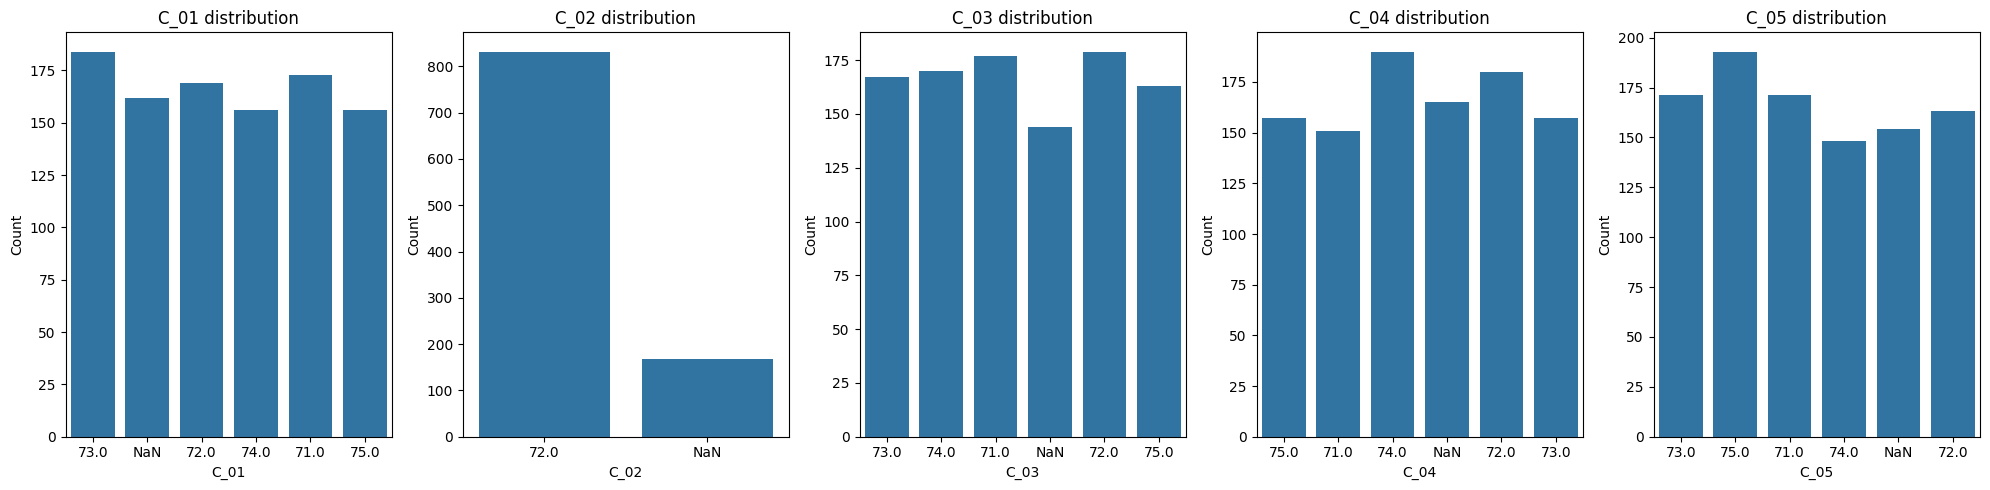

In [46]:
# Identify categorical features and convert them to object type
categorical_vars = ['C_01', 'C_02', 'C_03', 'C_04', 'C_05']
Xnew.loc[:, categorical_vars] = Xnew.loc[:,categorical_vars].astype('object')

# Visualize distribution of categorical variables
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, col in enumerate(categorical_vars):
    sns.countplot(x=col, data=Xnew.fillna('NaN'), ax=ax[i])
    ax[i].set_title(f'{col} distribution')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [47]:
# Again, remove variable C_02 as it has only one unique value so it does not provide any additional information
Xnew.drop(columns=['C_02'], inplace=True)
categorical_vars.remove('C_02')

Following the same procedure, we one-hot encoded our categorical variables.

In [48]:
# Handle categorical data - one hot encoding
Xnew = pd.get_dummies(Xnew, columns=categorical_vars) # we dont drop first column as there are missing values
Xnew = Xnew * 1
print(f"Xnew_dummies: {Xnew.shape}")
Xnew.head()

Xnew_dummies: (1000, 115)


,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,C_04_71.0,C_04_72.0,C_04_73.0,C_04_74.0,C_04_75.0,C_05_71.0,C_05_72.0,C_05_73.0,C_05_74.0,C_05_75.0
0,-0.843969,-9.104918,-5.076919,-4.222152,3.606609,-4.505494,-11.481997,16.201722,15.939470,NaN,...,0,0,0,0,1,0,0,1,0,0
1,0.802093,-10.196678,-4.500370,-7.827837,5.199002,NaN,-15.928708,20.151309,13.707194,-8.517576,...,1,0,0,0,0,0,0,0,0,1
2,4.234883,-10.798261,-0.465914,-6.054850,NaN,NaN,-16.182312,16.419564,12.152861,-6.418069,...,1,0,0,0,0,0,0,1,0,0
3,7.041336,-5.169413,-4.158334,-4.270638,14.939894,0.008338,-10.556799,NaN,14.180830,NaN,...,0,0,0,0,1,0,0,0,0,1
4,1.135564,-12.048088,-4.828939,-6.565217,7.493100,-2.789944,-15.859234,21.560086,14.147759,-4.848519,...,0,0,0,1,0,0,0,1,0,0


And applied KNN imputation to do some exploratory data analysis.

In [49]:
# KNN Imputation
imputer = KNNImputer(n_neighbors=9, weights="distance") 
Xnew_knn = Xnew.copy()
Xnew_knn.iloc[:, 0:95] = imputer.fit_transform(Xnew_knn.iloc[:, 0:95])

From the boxplots we can see the variables present more outliers, which is expected considering this dataset comprises 10 times mroe observations. The distribution of each variable seems somewhat aligned with the ones from the previous dataset.

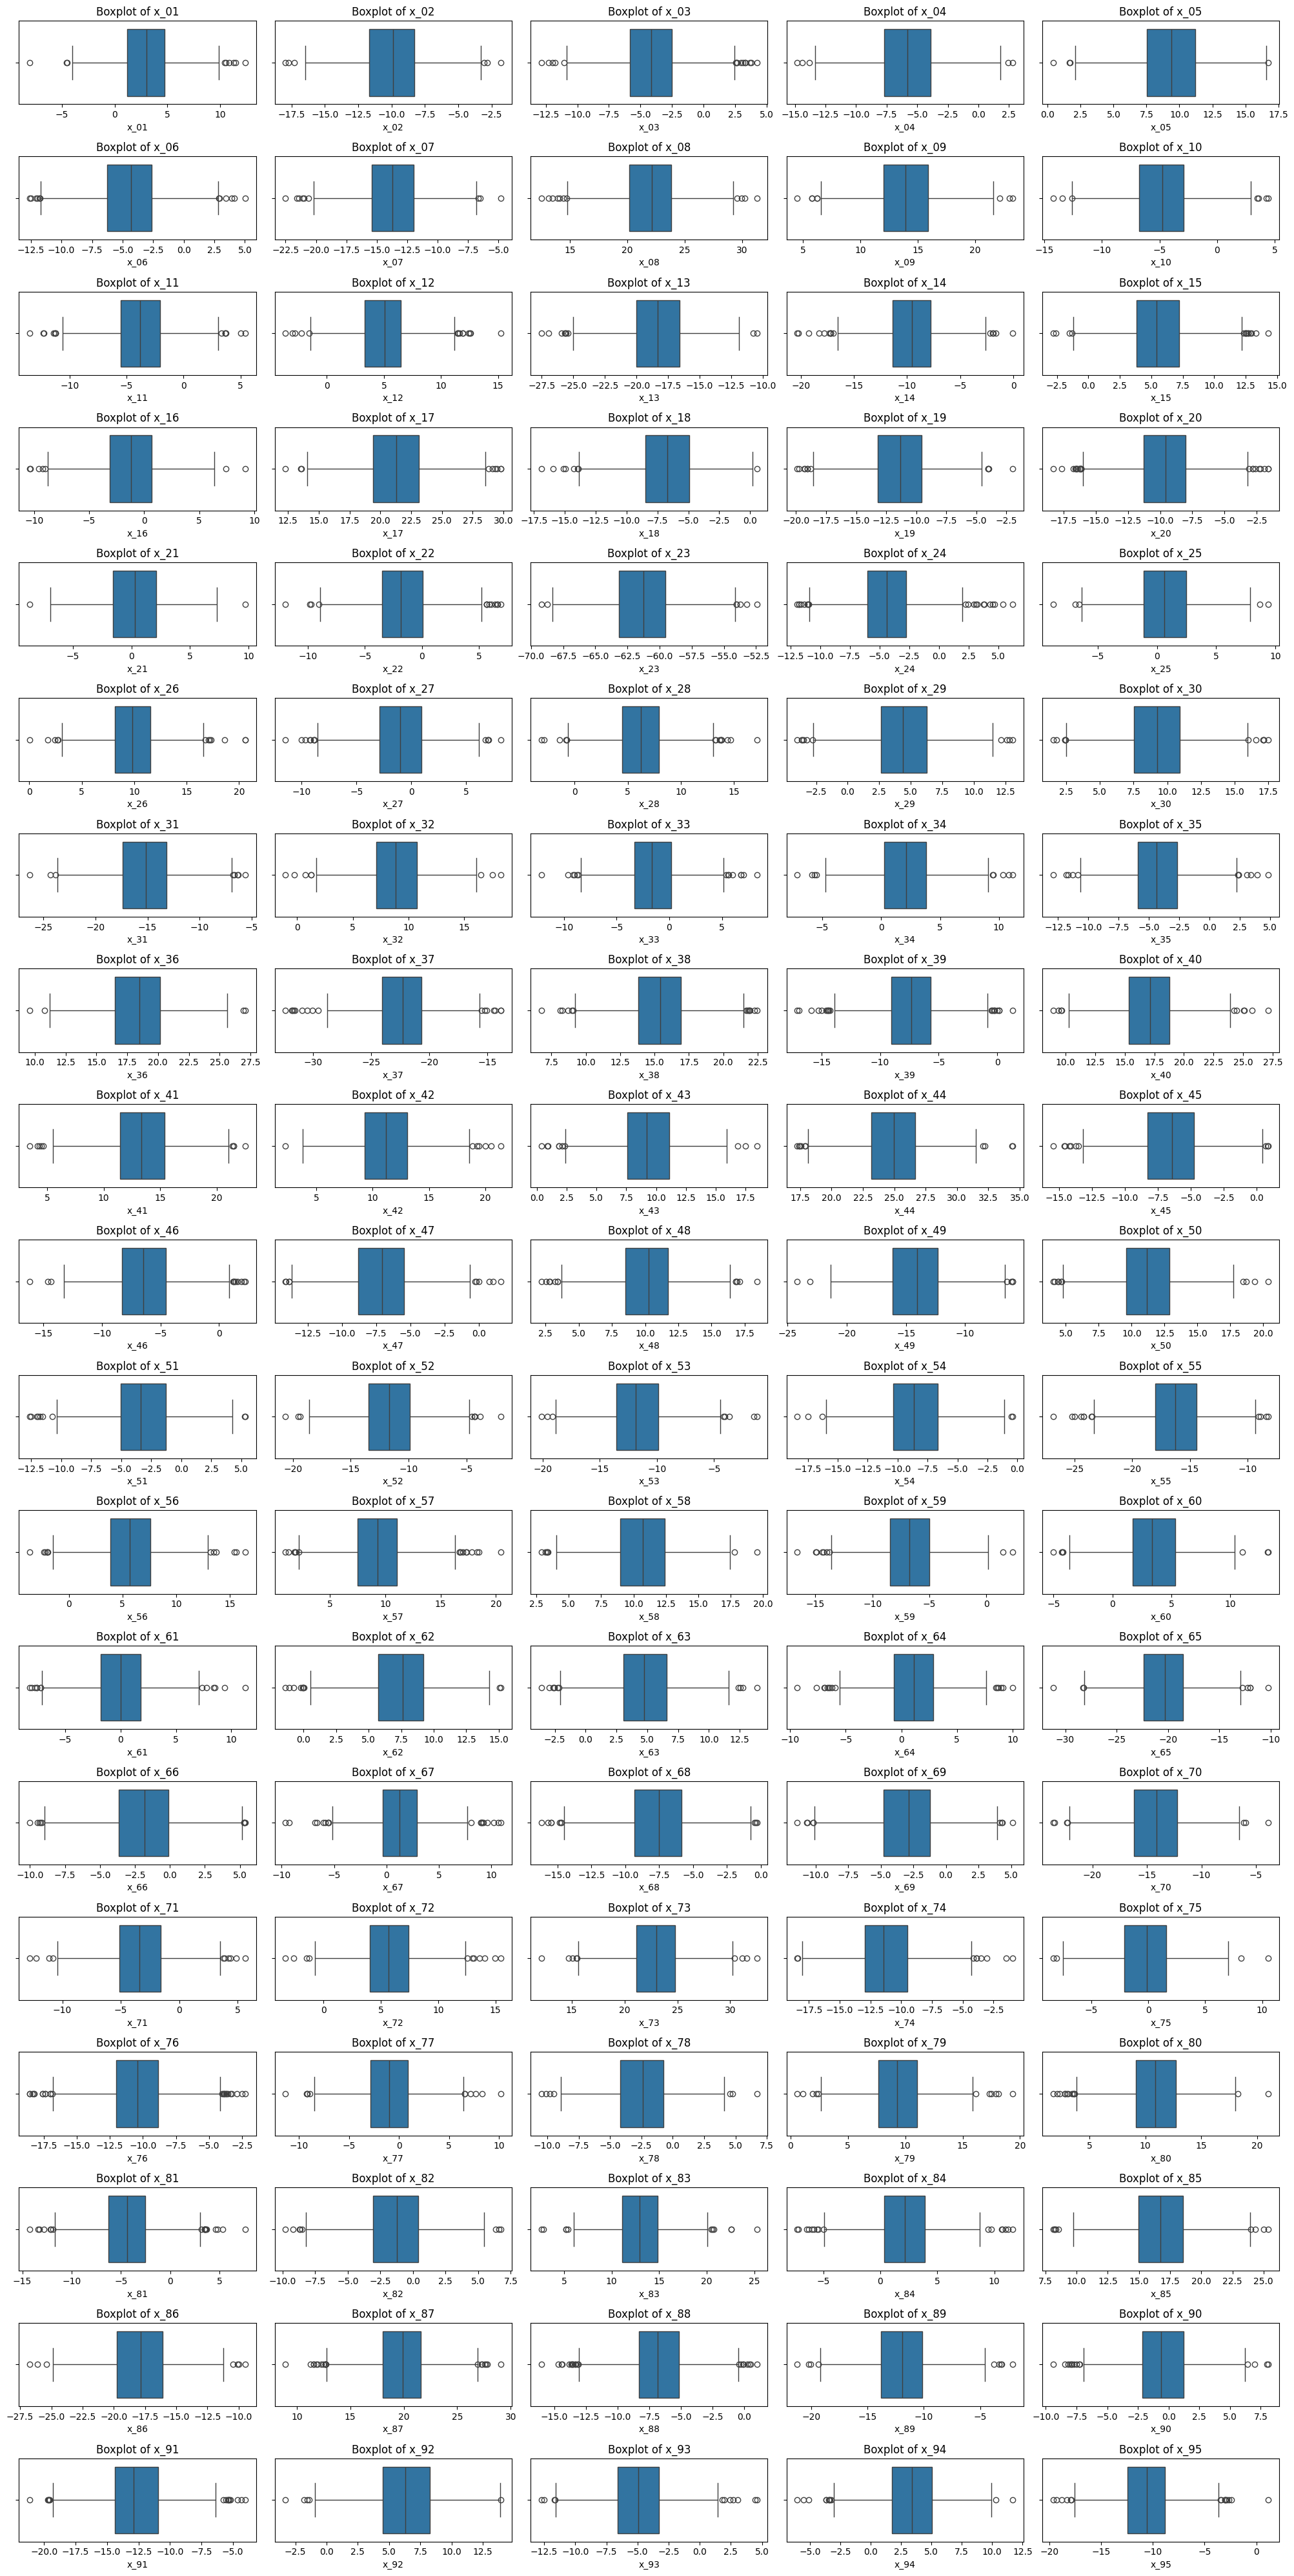

In [50]:
# Box plots of numerical features 
fig, ax = plt.subplots(19, 5, figsize=(20, 40))
for i, col in enumerate(Xnew_knn.iloc[:, 0:95].columns):
    sns.boxplot(x=col, data=Xnew_knn, ax=ax[i//5, i%5])
    ax[i//5, i%5].set_title(f'Boxplot of {col}')
    ax[i//5, i%5].set_xlabel(col)
plt.tight_layout()
plt.show()

#### Estimated RMSE:

To estimate the RMSE of our predictions on the new unseen data, we simply consider the generalizatino error of the lasso model, i.e. the mean of the test errors of the nested cv outer folds. This value is an estimate of how well the model is expected to perform in real-world scenarios where we do not have access to the training data.

In [51]:
# Calculate the mean of the outer test RMSE values for the Lasso model -> generalization error
# (we use the Lasso model as it was the best model in the previous steps)
estimated_rmse = np.mean(rmse_test[best_model_name])
print(f"Estimated RMSE for X_new: {estimated_rmse}")

Estimated RMSE for X_new: 26.99190720934836


#### Generate predictions:

To get our predictions (y_new_pred) from Xnew, we first impute the missing values and scale the numerical data. Then, we train the final selected model on the entire training set (X_final) with the chosen parameters. After training, we apply the same preprocessing steps (imputation and scaling) to the new data (Xnew) and use the trained model to make the predictions.

In [52]:
# Train the final model with the selected parameters (one-std-rule) on the full dataset
X_final = X.copy()
# Impute missing values for the full dataset
imputer = KNNImputer(n_neighbors=9, weights="distance")
X_final.iloc[:, 0:95] = imputer.fit_transform(X_final.iloc[:, 0:95])
# Scale numerical vars
scaler = StandardScaler()
X_final.iloc[:, 0:95] = scaler.fit_transform(X_final.iloc[:, 0:95])

# fit the model with the best parameters (one-std-rule) on the full dataset without a pipeline
best_model = models[best_model_name]
best_model.set_params(**{'alpha': best_alpha_one_std, 'random_state': 42, 'max_iter': 10000, 'fit_intercept': True})
best_model.fit(X_final, y)

# Impute missing values for the new data
imputer = KNNImputer(n_neighbors=9, weights="distance")
Xnew.iloc[:, 0:95] = imputer.fit_transform(Xnew.iloc[:, 0:95])
# Scale numerical vars
scaler = StandardScaler()
Xnew.iloc[:, 0:95] = scaler.fit_transform(Xnew.iloc[:, 0:95])

# Make predictions on Xnew
y_new_pred = best_model.predict(Xnew)

print("Predictions for the new data:", y_new_pred)
# Save values to csv
with open('estimatedRMSE_s233576_s226765.csv', 'w') as f:
    f.write(str(estimated_rmse))
pd.DataFrame(y_new_pred).to_csv('predictions_s233576_s226765.csv', index=False, header=False)

Predictions for the new data: [158.69765946 264.93572189 283.50622968 212.34537837 143.58038588
 113.91540949 189.34407014 183.36275078 214.10623897 281.25236039
 265.55966272 274.37355785 218.86597513 246.10171432 124.97318743
 184.10188408 196.38401079 140.86531477 246.85839398 190.29440742
 168.26270141 201.1457658  227.64619097 211.03756554 123.3193737
 211.33536371 168.64025784 217.98282051 347.40225592 183.36143852
 184.91110573 193.48187398 209.6250763  185.26263738 308.9636429
 224.92128597 288.26266477 216.89812416 285.26407588 247.07351167
 256.03262906 205.01478398 154.91997136 226.55699964 181.09340985
 326.49430379 185.52094422 161.09971364 145.80960974 228.20359506
 201.81055828 313.34772444 253.53792991 274.93934799 212.26170438
 186.76209968 263.41822991 135.36834187 264.28171403  61.46744519
 178.11429312 242.72420905 131.9950097  265.32447635 294.66184297
 277.14984495 203.52536006 271.34329626 168.44806841 218.0598253
 281.00476642 237.55219907 293.03446304 349.23270